In [1]:
#import matplotlib
#matplotlib.use("Qt5Agg")

In [2]:
import numpy as np
import pandas as pd

from visbrain.gui import Brain
from visbrain.objects import SourceObj, BrainObj, ColorbarObj, SceneObj
from visbrain.io import download_file, read_stc

import nilearn
from nilearn import datasets, surface, plotting
from nilearn.image import concat_imgs, mean_img
from nibabel import freesurfer as fs

/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Get PC and WCS scores from all conditions

In [3]:
# Delete later
#
#
#
# Get pc scores for C1 
pc_c1_path = "DistractWM/sub-102/graph_metrics/pc_cond1_space.npy"
pc_c1 = np.load(pc_c1_path)

# Get mean value
pc_c1 = np.mean(pc_c1, axis=0)
print("Shape of data for C1: " + str(pc_c1.shape))

# Get pc scores for C2 
pc_c2_path = "DistractWM/sub-102/graph_metrics/pc_cond2_space.npy"
pc_c2 = np.load(pc_c2_path)

# Get mean value
pc_c2 = np.mean(pc_c2, axis=0)
print("Shape of data for C2: " + str(pc_c2.shape))

# Get pc scores for C3 
pc_c3_path = "DistractWM/sub-102/graph_metrics/pc_cond3_space.npy"
pc_c3 = np.load(pc_c3_path)

# Get mean value
pc_c3 = np.mean(pc_c3, axis=0)
print("Shape of data for C3: " + str(pc_c3.shape))

# Get pc scores for C4 
pc_c4_path = "DistractWM/sub-102/graph_metrics/pc_cond4_space.npy"
pc_c4 = np.load(pc_c4_path)

# Get mean value
pc_c4 = np.mean(pc_c4, axis=0)
print("Shape of data for C4: " + str(pc_c4.shape))

Shape of data for C1: (400,)
Shape of data for C2: (400,)
Shape of data for C3: (400,)
Shape of data for C4: (400,)


In [4]:
# Paths to access files
home_dir = "DistractWM/"
c1_pc_path = "/graph_metrics/pc_cond1_space.npy"
c2_pc_path = "/graph_metrics/pc_cond2_space.npy"
c3_pc_path = "/graph_metrics/pc_cond3_space.npy"
c4_pc_path = "/graph_metrics/pc_cond4_space.npy"

c1_wcs_path = "/graph_metrics/wcs_cond1_space.npy"
c2_wcs_path = "/graph_metrics/wcs_cond2_space.npy"
c3_wcs_path = "/graph_metrics/wcs_cond3_space.npy"
c4_wcs_path = "/graph_metrics/wcs_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

# Average of each ........ 11 scores 
c1_pc_total = [] 
c2_pc_total = [] 
c3_pc_total = [] 
c4_pc_total = []

c1_wcs_total = [] 
c2_wcs_total = [] 
c3_wcs_total = [] 
c4_wcs_total = []

# Creat psudo-empty dataframe
c1_pc_df = pd.DataFrame()
c2_pc_df = pd.DataFrame()
c3_pc_df = pd.DataFrame()
c4_pc_df = pd.DataFrame()

c1_wcs_df = pd.DataFrame()
c2_wcs_df = pd.DataFrame()
c3_wcs_df = pd.DataFrame()
c4_wcs_df = pd.DataFrame()

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    """Omitting participant 103 because Nan input"""
    if(not((num == 103) or (num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_pc_path1 = home_dir + name + c1_pc_path
        full_pc_path2 = home_dir + name + c2_pc_path
        full_pc_path3 = home_dir + name + c3_pc_path
        full_pc_path4 = home_dir + name + c4_pc_path
        
        full_wcs_path1 = home_dir + name + c1_wcs_path
        full_wcs_path2 = home_dir + name + c2_wcs_path
        full_wcs_path3 = home_dir + name + c3_wcs_path
        full_wcs_path4 = home_dir + name + c4_wcs_path
        
        # Loading data     
        pc_c1 = np.load(full_pc_path1) 
        pc_c2 = np.load(full_pc_path2) 
        pc_c3 = np.load(full_pc_path3) 
        pc_c4 = np.load(full_pc_path4) 
        
        wcs_c1 = np.load(full_wcs_path1) 
        wcs_c2 = np.load(full_wcs_path2) 
        wcs_c3 = np.load(full_wcs_path3) 
        wcs_c4 = np.load(full_wcs_path4) 
        
        c1_pc_total.append(pc_c1)
        c2_pc_total.append(pc_c2)
        c3_pc_total.append(pc_c3)
        c4_pc_total.append(pc_c4)
        
        c1_wcs_total.append(wcs_c1)
        c2_wcs_total.append(wcs_c2)
        c3_wcs_total.append(wcs_c3)
        c4_wcs_total.append(wcs_c4)
        
        c1_pc_mean = np.mean(pc_c1, axis=0)
        c2_pc_mean = np.mean(pc_c2, axis=0)
        c3_pc_mean = np.mean(pc_c3, axis=0)
        c4_pc_mean = np.mean(pc_c4, axis=0)
        
        c1_wcs_mean = np.mean(wcs_c1, axis=0)
        c2_wcs_mean = np.mean(wcs_c2, axis=0)
        c3_wcs_mean = np.mean(wcs_c3, axis=0)
        c4_wcs_mean = np.mean(wcs_c4, axis=0)
        
        # Appending data to df
        c1_pc_df[name] = c1_pc_mean
        c2_pc_df[name] = c2_pc_mean
        c3_pc_df[name] = c3_pc_mean
        c4_pc_df[name] = c4_pc_mean
        
        c1_wcs_df[name] = c1_wcs_mean
        c2_wcs_df[name] = c2_wcs_mean
        c3_wcs_df[name] = c3_wcs_mean
        c4_wcs_df[name] = c4_wcs_mean

             
print("c1_pc_df shape: " + str(c1_pc_df.shape))
print("c2_pc_df shape: " + str(c2_pc_df.shape))
print("c3_pc_df shape: " + str(c3_pc_df.shape))
print("c4_pc_df shape: " + str(c4_pc_df.shape))

print("c1_wcs_df shape: " + str(c1_wcs_df.shape))
print("c2_wcs_df shape: " + str(c2_wcs_df.shape))
print("c3_wcs_df shape: " + str(c3_wcs_df.shape))
print("c4_wcs_df shape: " + str(c4_wcs_df.shape))

c1_pc_df shape: (400, 26)
c2_pc_df shape: (400, 26)
c3_pc_df shape: (400, 26)
c4_pc_df shape: (400, 26)
c1_wcs_df shape: (400, 26)
c2_wcs_df shape: (400, 26)
c3_wcs_df shape: (400, 26)
c4_wcs_df shape: (400, 26)


In [5]:
c1_total_pc_mean = np.array(c1_pc_df.mean(axis=1))
c2_total_pc_mean = np.array(c2_pc_df.mean(axis=1))
c3_total_pc_mean = np.array(c3_pc_df.mean(axis=1))
c4_total_pc_mean = np.array(c4_pc_df.mean(axis=1))

print("c1_total_pc_mean shape: " + str(c1_total_pc_mean.shape))
print("c2_total_pc_mean shape: " + str(c2_total_pc_mean.shape))
print("c3_total_pc_mean shape: " + str(c3_total_pc_mean.shape))
print("c4_total_pc_mean shape: " + str(c4_total_pc_mean.shape))

c1_total_wcs_mean = np.array(c1_wcs_df.mean(axis=1))
c2_total_wcs_mean = np.array(c2_wcs_df.mean(axis=1))
c3_total_wcs_mean = np.array(c3_wcs_df.mean(axis=1))
c4_total_wcs_mean = np.array(c4_wcs_df.mean(axis=1))

print("c1_total_wcs_mean shape: " + str(c1_total_wcs_mean.shape))
print("c2_total_wcs_mean shape: " + str(c2_total_wcs_mean.shape))
print("c3_total_wcs_mean shape: " + str(c3_total_wcs_mean.shape))
print("c4_total_wcs_mean shape: " + str(c4_total_wcs_mean.shape))

c1_total_pc_mean shape: (400,)
c2_total_pc_mean shape: (400,)
c3_total_pc_mean shape: (400,)
c4_total_pc_mean shape: (400,)
c1_total_wcs_mean shape: (400,)
c2_total_wcs_mean shape: (400,)
c3_total_wcs_mean shape: (400,)
c4_total_wcs_mean shape: (400,)


In [6]:
c1_pc_df.head()

sub-102   sub-104   sub-105   sub-106   sub-107   sub-108   sub-109  \
0  0.115011  0.286804  0.262997  0.087564  0.426024  0.284416  0.182126   
1  0.097255  0.091828  0.243083  0.078283  0.135999  0.256268  0.180285   
2  0.337252  0.210984  0.007814  0.233148  0.316818  0.070678  0.078387   
3  0.322502  0.271412  0.023234  0.481783  0.358541  0.007587  0.015870   
4  0.177062  0.219191  0.004820  0.144924  0.503120  0.000000  0.000000   

    sub-110   sub-112   sub-114  ...   sub-121   sub-122   sub-123   sub-124  \
0  0.157131  0.086948  0.297955  ...  0.103673  0.021792  0.560712  0.032396   
1  0.182380  0.048800  0.331151  ...  0.117178  0.443905  0.540775  0.042534   
2  0.041438  0.116919  0.159754  ...  0.186559  0.116300  0.092956  0.076612   
3  0.246329  0.132701  0.149647  ...  0.021162  0.033860  0.333721  0.154242   
4  0.055024  0.000000  0.094352  ...  0.031388  0.000000  0.080132  0.171400   

    sub-125   sub-126   sub-129   sub-130   sub-131   sub-132  
0  0.030684  0.158919  0.491707  0.403133  0.395990  0.244808  
1  0.000000  0.211439  0.403782  0.171211  0.194801  0.181660  
2  0.137011  0.028801  0.326440  0.416036  0.473224  0.231535  
3  0.066557  0.000000  0.074858  0.373621  0.374614  0.373869  
4  0.000000  0.000000  0.158256  0.226289  0.355584  0.213139  

[5 rows x 26 columns]

In [7]:
c2_pc_df.head()

sub-102   sub-104   sub-105   sub-106   sub-107   sub-108   sub-109  \
0  0.196391  0.444796  0.478137  0.483253  0.553228  0.348506  0.315412   
1  0.156624  0.406582  0.387685  0.218089  0.246406  0.382861  0.373206   
2  0.277472  0.244114  0.048523  0.142220  0.463096  0.033983  0.090661   
3  0.263485  0.393317  0.160752  0.454116  0.499183  0.313983  0.323050   
4  0.031689  0.060609  0.112365  0.116583  0.362121  0.060765  0.108035   

    sub-110   sub-112   sub-114  ...   sub-121   sub-122   sub-123   sub-124  \
0  0.364463  0.503452  0.106742  ...  0.091279  0.451999  0.094956  0.081974   
1  0.219177  0.355810  0.115522  ...  0.061055  0.241039  0.131073  0.031321   
2  0.112750  0.107063  0.030809  ...  0.083400  0.171360  0.231163  0.068928   
3  0.451120  0.132972  0.174387  ...  0.149421  0.272534  0.072263  0.058217   
4  0.157727  0.000000  0.028657  ...  0.017615  0.000000  0.047337  0.079376   

    sub-125   sub-126   sub-129   sub-130   sub-131   sub-132  
0  0.212275  0.000000  0.330054  0.269423  0.511099  0.213909  
1  0.097443  0.518025  0.097105  0.109467  0.077698  0.148851  
2  0.360555  0.066922  0.160963  0.328202  0.489966  0.040847  
3  0.245907  0.000000  0.063141  0.319177  0.200446  0.044546  
4  0.000000  0.000000  0.186684  0.259938  0.486236  0.070904  

[5 rows x 26 columns]

In [8]:
c3_pc_df.head()

sub-102   sub-104   sub-105   sub-106   sub-107   sub-108   sub-109  \
0  0.179816  0.300593  0.406116  0.383734  0.473594  0.346626  0.507504   
1  0.057167  0.350791  0.414325  0.204919  0.344249  0.278182  0.588847   
2  0.388997  0.272176  0.077083  0.198175  0.345165  0.152123  0.288578   
3  0.311189  0.243400  0.175501  0.573324  0.315272  0.157551  0.303929   
4  0.176607  0.184455  0.211825  0.186085  0.049076  0.043755  0.145545   

    sub-110   sub-112   sub-114  ...   sub-121   sub-122   sub-123   sub-124  \
0  0.279683  0.302150  0.102400  ...  0.332816  0.352188  0.368684  0.013910   
1  0.202721  0.164992  0.076590  ...  0.192868  0.527904  0.498420  0.005000   
2  0.408401  0.311360  0.015909  ...  0.438332  0.183903  0.261633  0.032766   
3  0.677800  0.289105  0.114603  ...  0.248324  0.080623  0.295016  0.030807   
4  0.424252  0.000000  0.010444  ...  0.438174  0.000000  0.151182  0.004042   

    sub-125   sub-126   sub-129   sub-130   sub-131   sub-132  
0  0.245310  0.000000  0.576810  0.306274  0.187781  0.393001  
1  0.013896  0.079370  0.507559  0.139900  0.127320  0.203437  
2  0.000000  0.000000  0.566957  0.064278  0.372374  0.124678  
3  0.000000  0.000000  0.287076  0.065004  0.192157  0.178970  
4  0.154236  0.045451  0.053476  0.000000  0.185280  0.063386  

[5 rows x 26 columns]

In [9]:
c4_pc_df.head()

sub-102   sub-104   sub-105   sub-106   sub-107   sub-108   sub-109  \
0  0.168343  0.423639  0.380295  0.168170  0.502712  0.125384  0.309754   
1  0.153589  0.260571  0.269699  0.100779  0.261321  0.108122  0.244428   
2  0.362375  0.279707  0.065880  0.061219  0.245924  0.036422  0.196945   
3  0.416064  0.265596  0.064850  0.149563  0.273185  0.014154  0.431743   
4  0.202367  0.043078  0.069121  0.062803  0.209984  0.024022  0.150964   

    sub-110   sub-112   sub-114  ...   sub-121   sub-122   sub-123   sub-124  \
0  0.438609  0.419368  0.166534  ...  0.217124  0.189716  0.299061  0.219901   
1  0.418357  0.355510  0.149926  ...  0.196418  0.467396  0.147277  0.235525   
2  0.388923  0.242786  0.156794  ...  0.203847  0.180030  0.387860  0.215592   
3  0.509580  0.356956  0.198928  ...  0.074931  0.025479  0.484132  0.163471   
4  0.078854  0.045794  0.186334  ...  0.000000  0.000000  0.382168  0.014167   

    sub-125   sub-126   sub-129   sub-130   sub-131   sub-132  
0  0.415971  0.000000  0.638211  0.068936  0.490756  0.187301  
1  0.044024  0.040951  0.442776  0.071809  0.097754  0.261315  
2  0.294283  0.057847  0.374554  0.149617  0.486209  0.282870  
3  0.018589  0.040501  0.000000  0.282089  0.180078  0.277486  
4  0.110134  0.000000  0.087775  0.040282  0.478584  0.046293  

[5 rows x 26 columns]

In [10]:
c1_wcs_df.head()

sub-102   sub-104   sub-105   sub-106   sub-107   sub-108   sub-109  \
0  1.116555  1.061548  0.211476  0.036010 -0.392850  1.424642 -0.730261   
1 -0.072024  0.942841  0.332596  0.033233 -0.817984  0.547536  0.488506   
2  1.237353  0.977570 -0.268829  0.327491  1.129101 -0.552335 -0.139143   
3 -0.055927  1.739423  0.372779  0.805009  0.945597 -0.505679 -1.500844   
4  0.063589 -1.208270 -1.051725 -0.040367 -0.729459 -1.459343 -0.845701   

    sub-110   sub-112   sub-114  ...   sub-121   sub-122   sub-123   sub-124  \
0  0.853844 -0.662922 -0.735066  ...  0.934844  1.068275 -0.733371  0.189781   
1  0.847559 -0.658760 -0.702679  ...  0.805939  1.174763  0.395642  0.426950   
2  0.784919 -0.142761 -0.605576  ...  0.685479  1.086201 -0.446661  1.104759   
3 -0.017856  1.079510  0.553363  ... -0.213937 -0.015179  0.286162  0.072332   
4 -0.342506 -1.545086 -0.619389  ... -1.380428 -0.120982  0.001974 -0.538372   

    sub-125   sub-126   sub-129   sub-130   sub-131   sub-132  
0  0.683510 -1.170901  0.304617  0.260336  0.516970  0.061688  
1 -1.007646 -0.203815  0.174610  1.086596  0.737762  1.886931  
2 -0.805555 -1.570884 -1.179366 -0.104446  1.684620  0.197270  
3 -1.644577 -1.694547 -2.145268  0.624489  1.428651  0.176630  
4 -1.519930 -1.162359 -1.536993 -0.529323  0.207311 -1.159938  

[5 rows x 26 columns]

In [11]:
c2_wcs_df.head()

sub-102   sub-104   sub-105   sub-106   sub-107   sub-108   sub-109  \
0  1.151197  0.389442  0.396062 -0.213337 -0.278846  1.265919  0.972404   
1  0.272927 -0.178866 -0.905239  0.752270 -0.086795  0.887957  1.149533   
2  1.694021  0.404194  0.725584  0.980681  1.831230  0.371046  0.871476   
3  1.023077  0.856275  1.268076 -0.017434  1.282325  0.334893  0.469922   
4 -0.118465 -0.608347  1.451829  0.766447 -0.538280 -1.072136 -0.765600   

    sub-110   sub-112   sub-114  ...   sub-121   sub-122   sub-123   sub-124  \
0 -0.424138 -0.718601 -0.877794  ...  0.555880  0.190987 -0.764504 -0.644669   
1  0.129182 -0.788670 -0.181498  ...  0.513135  0.958643  0.410327  0.999257   
2  1.040421 -0.718823 -0.699879  ... -0.017335  0.309383 -0.294732  0.855226   
3  0.045840  0.321025  0.890127  ... -0.683489 -0.420602  0.925321  1.052447   
4 -0.558769 -1.733856 -0.798306  ... -1.537438  0.028681  0.034841  0.610658   

    sub-125   sub-126   sub-129   sub-130   sub-131   sub-132  
0  0.508243 -0.379775  0.096359  0.621020 -0.116672  0.365850  
1 -1.080911  1.649672  0.648263 -0.005013  1.296497  1.686381  
2 -0.659748 -0.043010 -1.934723  0.808339  0.380718  0.397230  
3 -2.086576 -1.210613 -1.814400  0.564543  1.182577  0.133399  
4  0.085858 -1.675208 -1.416576  0.352329 -0.256351 -0.707376  

[5 rows x 26 columns]

In [12]:
c3_wcs_df.head()

sub-102   sub-104   sub-105   sub-106   sub-107   sub-108   sub-109  \
0  0.544222  1.061900 -0.131996  0.857147 -0.299742  0.614475  0.351847   
1  0.117638  0.550542  0.315982  0.812568  0.003100 -0.445494 -0.229399   
2  1.996131  0.960870 -0.046080  0.708808  1.580411  0.109667  0.815930   
3  1.480558  1.069557  1.521697 -0.130290  1.542562 -0.101999  0.455147   
4 -0.076887 -0.510828 -0.299403  0.908895 -0.791212 -1.596389 -0.251382   

    sub-110   sub-112   sub-114  ...   sub-121   sub-122   sub-123   sub-124  \
0 -0.463415 -0.202511 -0.298851  ...  0.532062 -0.286049 -0.481336  0.172579   
1  0.030797  0.071546 -0.337482  ...  0.883500  0.130914 -0.372821  0.266831   
2 -0.558389  0.285958 -0.924226  ...  0.941373  1.513226 -0.322065  0.791661   
3  0.010054  1.101427  1.130316  ... -0.017157  0.281140  0.819655  0.358508   
4 -0.658103 -1.770149 -0.994948  ... -1.268515  0.305647 -0.321001 -0.320545   

    sub-125   sub-126   sub-129   sub-130   sub-131   sub-132  
0  1.175956 -1.851972 -0.252477  1.210834  0.365075 -1.511104  
1  0.238375 -0.086492 -0.412516  0.459327  0.891091  1.124257  
2 -0.725175 -0.478500 -1.030607 -0.445942  1.037990  0.627307  
3 -1.178784 -1.381353 -0.858844  0.061228  1.219249  0.608749  
4 -1.415257 -1.343450 -1.571614 -1.813564  0.206855 -1.490910  

[5 rows x 26 columns]

In [13]:
c4_wcs_df.head()

sub-102   sub-104   sub-105   sub-106   sub-107   sub-108   sub-109  \
0  0.822361  0.792461  0.878968  0.494214  0.369446  1.067809  0.627704   
1 -0.450486  1.410875 -1.002638  1.246810 -0.425072  0.716658  0.421573   
2  2.473636  0.321244  1.090932  1.142840  0.978646 -1.170731  0.569532   
3  2.705365  1.131457  0.998239  1.118379  0.851268 -0.399421  0.919583   
4  0.633382 -0.889387  0.519065  0.741240 -0.562806 -2.055559 -0.439446   

    sub-110   sub-112   sub-114  ...   sub-121   sub-122   sub-123   sub-124  \
0 -0.627553 -0.349974 -1.349634  ...  0.040306  1.569581  0.464051  0.323952   
1  1.218175  0.124005 -0.657306  ... -0.056068  0.705812  0.768699  0.726794   
2  0.514630 -0.514486 -0.435651  ...  0.783703  2.395551 -0.686225  0.575705   
3  0.397115  1.642133  1.239896  ... -0.157433 -0.905040  0.631760  0.860095   
4 -0.044055 -1.404918 -0.042197  ... -1.231135 -0.094016 -0.656217 -0.279865   

    sub-125   sub-126   sub-129   sub-130   sub-131   sub-132  
0 -0.663492 -1.572347  0.940946  0.905131  0.383886 -1.214012  
1 -0.672730 -0.646251 -0.201621  0.464102  1.060377  0.111365  
2 -1.094905 -0.306109 -1.016750  0.153149  1.180563  0.069337  
3 -2.070671 -1.408561 -1.571946  0.678886  1.179221  0.058476  
4  0.140988 -1.810088  1.292247 -0.274161  0.597172 -1.370035  

[5 rows x 26 columns]

#### Inspecting sub-103 data

In [14]:
path_c1_pc_103 = "DistractWM/sub-103/graph_metrics/pc_cond1_space.npy"
path_c2_pc_103 = "DistractWM/sub-103/graph_metrics/pc_cond2_space.npy"
path_c3_pc_103 = "DistractWM/sub-103/graph_metrics/pc_cond3_space.npy"
path_c4_pc_103 = "DistractWM/sub-103/graph_metrics/pc_cond4_space.npy"

path_c1_wcs_103 = "DistractWM/sub-103/graph_metrics/wcs_cond1_space.npy"
path_c2_wcs_103 = "DistractWM/sub-103/graph_metrics/wcs_cond2_space.npy"
path_c3_wcs_103 = "DistractWM/sub-103/graph_metrics/wcs_cond3_space.npy"
path_c4_wcs_103 = "DistractWM/sub-103/graph_metrics/wcs_cond4_space.npy"

c1_pc_103 = np.load(path_c1_pc_103)
c2_pc_103 = np.load(path_c2_pc_103)
c3_pc_103 = np.load(path_c3_pc_103)
c4_pc_103 = np.load(path_c4_pc_103)
print("c1_pc : " + str(c1_pc_103[:, 0:5]))
print("c2_pc : " + str(c2_pc_103[:, 0:5]))
print("c3_pc : " + str(c3_pc_103[:, 0:5]))
print("c4_pc : " + str(c4_pc_103[:, 0:5]))

c1_pc : [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
c2_pc : [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
c3_pc : [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
c4_pc : [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]

In [15]:
c1_wcs_103 = np.load(path_c1_wcs_103)
c2_wcs_103 = np.load(path_c2_wcs_103)
c3_wcs_103 = np.load(path_c3_wcs_103)
c4_wcs_103 = np.load(path_c4_wcs_103)
print("c1_wcs : " + str(c1_wcs_103[:, 0:5]))
print("c2_wcs : " + str(c2_wcs_103[:, 0:5]))
print("c3_wcs : " + str(c3_wcs_103[:, 0:5]))
print("c4_wcs : " + str(c4_wcs_103[:, 0:5]))

c1_wcs : [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
c2_wcs : [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
c3_wcs : [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
c4_wcs : [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan 

## Get coordinates from each node

### Get coordinates for B3 surface

In [16]:
# Get Schatlas info
# Get parcellation atlas from nilearn
atlas_file = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2)

# Visualize parcellation atlas
atlas_maps = atlas_file.maps

# Get coordinates and labels
# This coordinates work for (B1, B2, B3, white) surfaces
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_maps, return_label_names=False)
print("coordinates shape: " + str(coordinates.shape))

coordinates_left = coordinates[0:200, :]
coordinates_right = coordinates[200:400, :]
print("coordinates_left shape: " + str(coordinates_left.shape))
print("coordinates_right shape: " + str(coordinates_right.shape))

B3_coords_df = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
B3_coords_df.head()


coordinates shape: (400, 3)
coordinates_left shape: (200, 3)
coordinates_right shape: (200, 3)


x          y          z
0 -35.365696 -62.032362 -17.055016
1 -23.350588 -72.696471 -10.296471
2 -36.414566 -81.389356 -15.966387
3 -16.950000 -86.387500 -14.987500
4 -24.406780 -96.745763 -11.924670

### Get coordinates for fsaverage inflated surface

In [17]:
# Load annot files (fsaverage)
rh_annot_path = "Parcellations/FreeSurfer5.3/fsaverage/label/rh.Schaefer2018_400Parcels_17Networks_order.annot"
rh_label_annot = fs.io.read_annot(rh_annot_path)
labels_r = rh_label_annot[2]
print("labels_r shape: " + str(len(labels_r)))

# RGBT + label id colortable array
ar_1_r = rh_label_annot[1] 
print("ar_1_r shape: " + str(ar_1_r.shape))

# The names of the labels. The length of the list is n_labels.
vert_r = rh_label_annot[0]
print("vert_r shape: " + str(vert_r.shape))

#lh_label_annot
lh_annot_path = "Parcellations/FreeSurfer5.3/fsaverage/label/lh.Schaefer2018_400Parcels_17Networks_order.annot"
lh_label_annot = fs.io.read_annot(lh_annot_path)
labels_l = lh_label_annot[2]
print("labels_l shape: " + str(len(labels_l)))

# RGBT + label id colortable array
ar_1_l = lh_label_annot[1] 
print("ar_1_l shape: " + str(ar_1_l.shape))

# The names of the labels. The length of the list is n_labels.
vert_l = lh_label_annot[0]
print("vert_l shape: " + str(vert_l.shape))


labels_r shape: 201
ar_1_r shape: (201, 5)
vert_r shape: (163842,)
labels_l shape: 201
ar_1_l shape: (201, 5)
vert_l shape: (163842,)


In [18]:
# Load fsaverage inflated files
rh_infl_path = "Parcellations/FreeSurfer5.3/fsaverage/surf/rh.inflated"
lh_infl_path = "Parcellations/FreeSurfer5.3/fsaverage/surf/lh.inflated"

# Get vertices form right hemisphere
rr_r, _ = surface.load_surf_mesh(rh_infl_path)
print("rr_r shape:" + str(rr_r.shape))

# Get vertices form left hemisphere
rr_l, _ = surface.load_surf_mesh(lh_infl_path)
print("rr_l shape:" + str(rr_l.shape))

rr_r shape:(163842, 3)
rr_l shape:(163842, 3)


In [19]:
fs_coords_r = []
fs_coords_l = [] 

# Extract coordinates from fsaverage vertices
for k, label in enumerate(labels_r):
    if "Unknown" not in str(label):
        fs_coords_r.append(np.mean(rr_r[vert_r == k], axis=0))
        
for k, label in enumerate(labels_l):
    if "Unknown" not in str(label):
        fs_coords_l.append(np.mean(rr_l[vert_l == k], axis=0))

fs_coords_r = np.array(fs_coords_r)
fs_coords_l = np.array(fs_coords_l)

# Drop the first coordinate from each array
fs_coords_r = fs_coords_r[1:201, :]
fs_coords_l = fs_coords_l[1:201, :]

print("fs_coords_r shape:" + str(fs_coords_r.shape))
print("fs_coords_l shape:" + str(fs_coords_l.shape))

# Add/subtract 45 to x-axis from the left/right hemisphere
fs_coords_l[:, 0] = fs_coords_l[:, 0] - 45
fs_coords_r[:, 0] = fs_coords_r[:, 0] + 45

# Stack both hemispheres coords        
fs_coords = np.vstack((fs_coords_l[0:200, :], fs_coords_r[0:200, :]))
print("fs_coords" + str(fs_coords.shape))

fs_coords_df = pd.DataFrame(fs_coords, columns=['x', 'y', 'z'])
fs_coords_df.head()


fs_coords_r shape:(200, 3)
fs_coords_l shape:(200, 3)
fs_coords(400, 3)


x           y          z
0 -54.122210  -58.079150 -48.450137
1 -39.967822  -72.489451 -42.158973
2 -49.948026  -84.525591 -41.570918
3 -34.314189  -91.656058 -37.525516
4 -41.484789 -101.889521 -31.092271

## C1 PC Brain plots

In [20]:
# Create Scene creation
c1_sc_b3_outer = SceneObj(bgcolor='black', size=(1000, 600))
c1_sc_b3_inner = SceneObj(bgcolor='black', size=(1000, 600))

c1_sc_fs_outer = SceneObj(bgcolor='black', size=(1000, 600))
c1_sc_fs_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters for 'title'
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene
Creation of a scene
Creation of a scene


In [21]:
def add_B3_to_scene(scene, data, coords, row, col, hemisphere, orientation):
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add C1 data
    kwargs['data'] = data

    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10 #2               
    kwargs['radius_max'] = 10 #10
 
    # Create 'source object'     
    s_obj_c1 = SourceObj('SourceExample', coords, **kwargs)

    # Add color to nodes
    s_obj_c1.color_sources(data=kwargs['data'], cmap='viridis')

    # Create 'Brain object'
    b_obj_c1 = BrainObj('B3', hemisphere=hemisphere, translucent=False)
    b_obj_c1_vert = b_obj_c1.vertices
    
    # Fit nodes to vertices
    s_obj_c1.fit_to_vertices(b_obj_c1_vert)
    
    # Add objects to scene
    scene.add_to_subplot(s_obj_c1, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    
    scene.add_to_subplot(b_obj_c1, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True) 


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


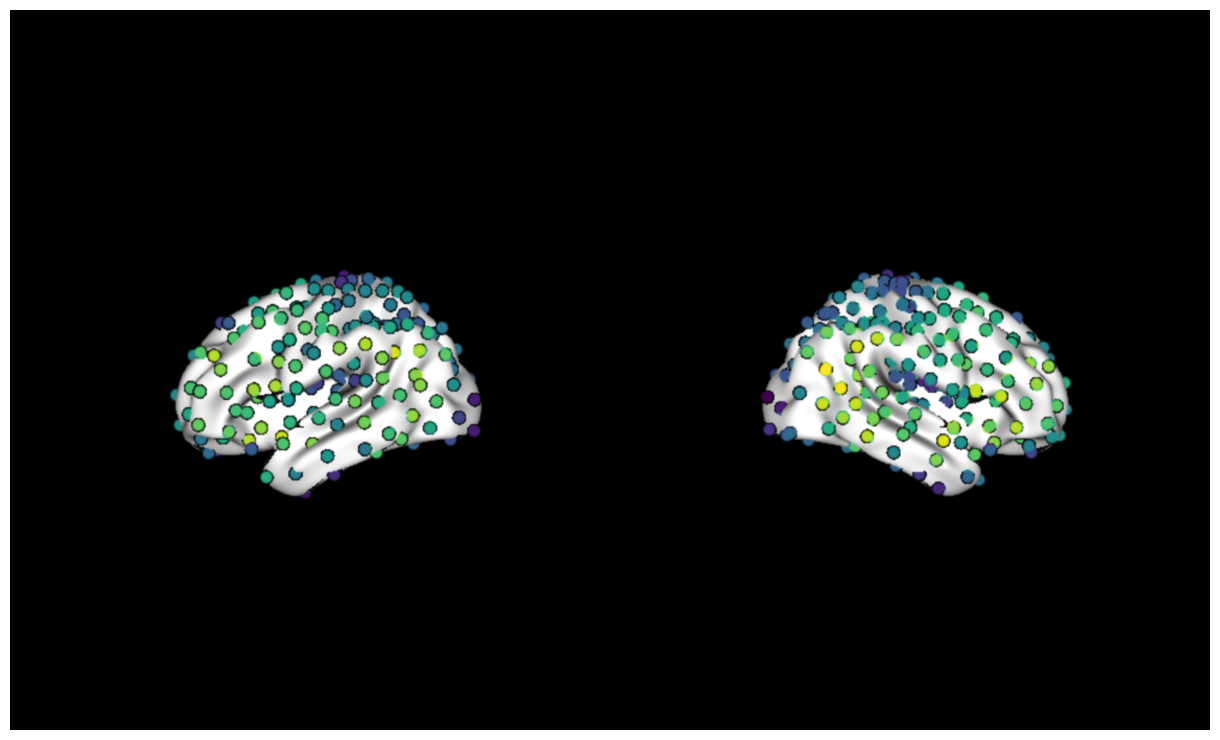

In [22]:
add_B3_to_scene(scene=c1_sc_b3_outer, data=c1_total_pc_mean, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=c1_sc_b3_outer, data=c1_total_pc_mean, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
c1_sc_b3_outer.preview()


SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


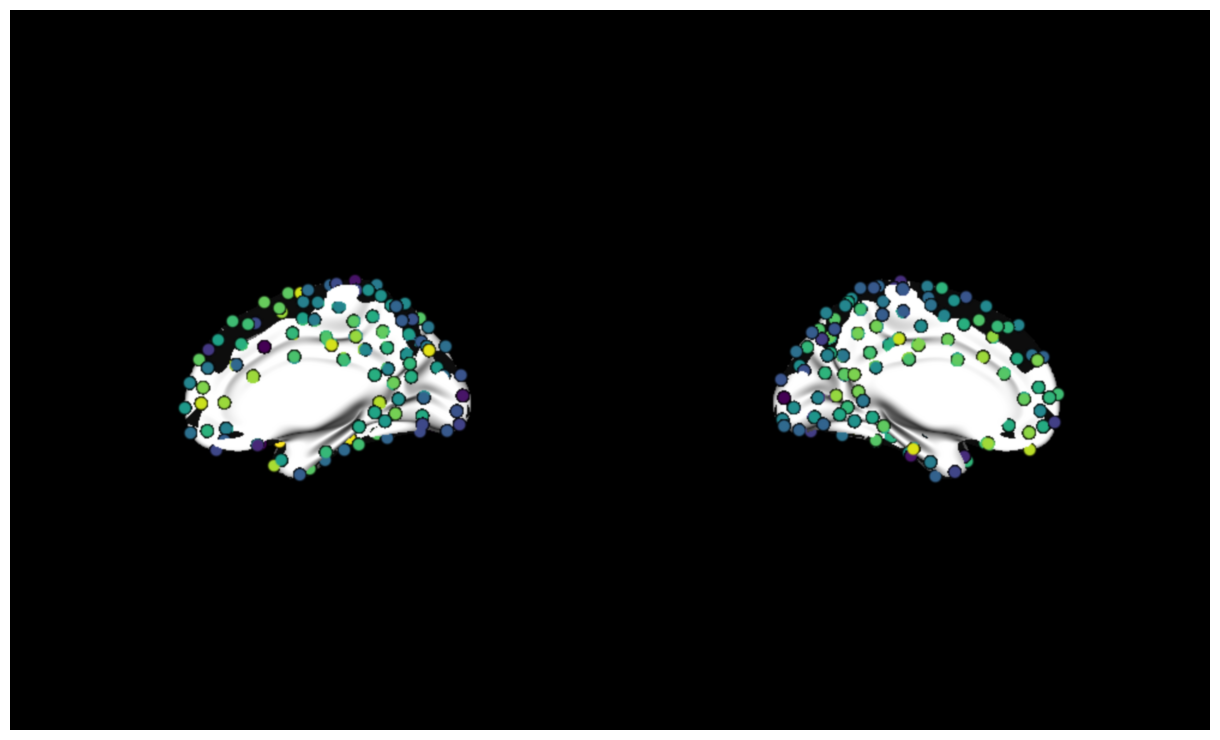

In [23]:
add_B3_to_scene(scene=c1_sc_b3_inner, data=c1_total_pc_mean[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=c1_sc_b3_inner, data=c1_total_pc_mean[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

c1_sc_b3_inner.preview()


In [24]:
def add_fs_to_scene(scene, data, coords, row, col, hemisphere, orientation):
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add C1 data
    kwargs['data'] = data

    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10 #2               
    kwargs['radius_max'] = 10 #10
 
    # Create 'source object'     
    s_obj_c1 = SourceObj('SourceExample', coords, **kwargs)

    # Add color to nodes
    s_obj_c1.color_sources(data=kwargs['data'], cmap='viridis')

    # Create 'Brain object'
    b_obj_c1 = BrainObj('inflated', hemisphere=hemisphere, translucent=False)
    b_obj_c1_vert = b_obj_c1.vertices
    
    # Fit nodes to vertices
    s_obj_c1.fit_to_vertices(b_obj_c1_vert)
    
    # Add objects to scene
    scene.add_to_subplot(s_obj_c1, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    
    scene.add_to_subplot(b_obj_c1, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True) 


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


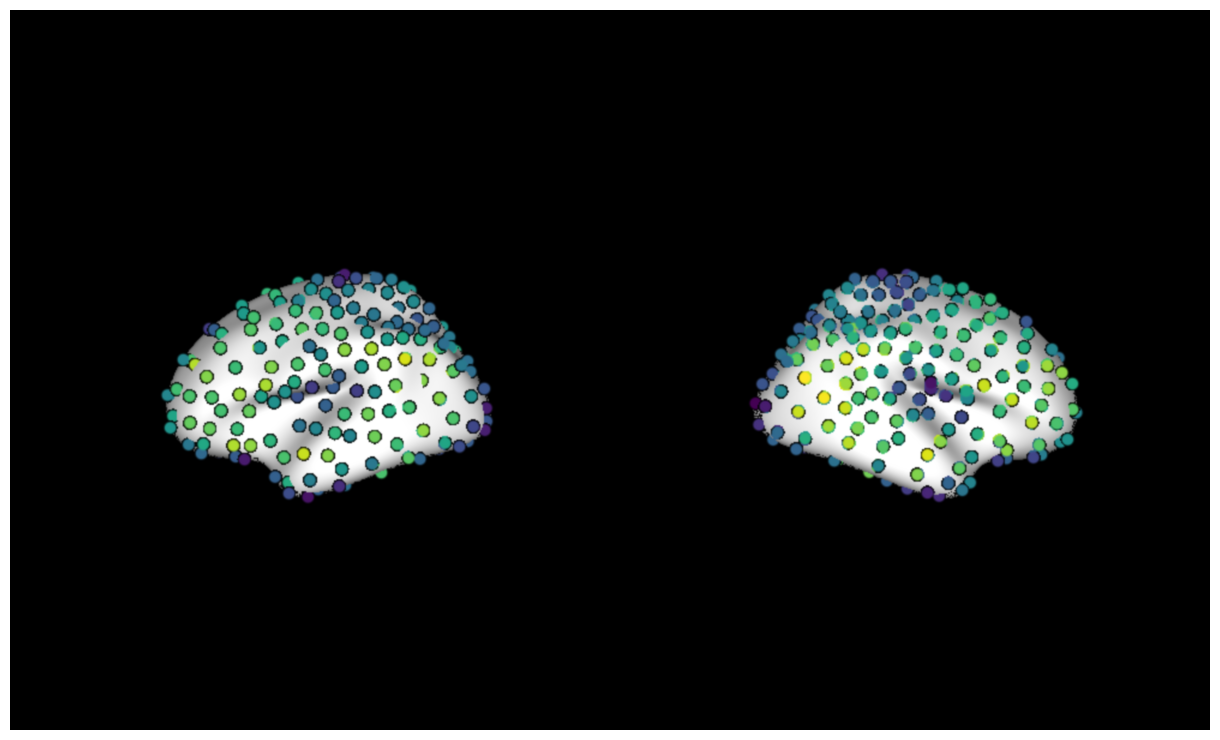

In [25]:
add_fs_to_scene(scene=c1_sc_fs_outer, data=c1_total_pc_mean, coords=fs_coords, row=0, col=0, hemisphere='both', orientation='left')
add_fs_to_scene(scene=c1_sc_fs_outer, data=c1_total_pc_mean, coords=fs_coords, row=0, col=1, hemisphere='both', orientation='right')
c1_sc_fs_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


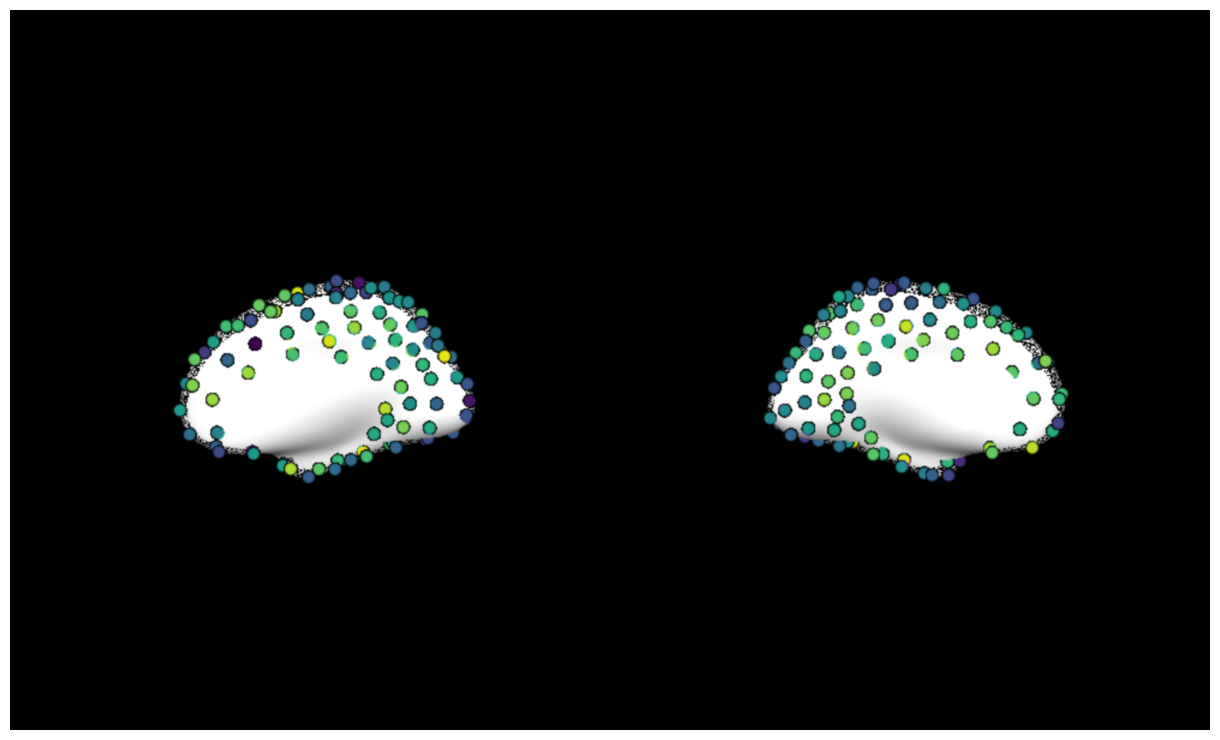

In [26]:
add_fs_to_scene(scene=c1_sc_fs_inner, data=c1_total_pc_mean[0:200], coords=fs_coords_r, row=0, col=0, hemisphere='right', orientation='left')
add_fs_to_scene(scene=c1_sc_fs_inner, data=c1_total_pc_mean[200:400], coords=fs_coords_l, row=0, col=1, hemisphere='left', orientation='right')
c1_sc_fs_inner.preview()

## C2 PC Brain plots

In [27]:
# Create Scene creation
c2_sc_b3_outer = SceneObj(bgcolor='black', size=(1000, 600))
c2_sc_b3_inner = SceneObj(bgcolor='black', size=(1000, 600))

c2_sc_fs_outer = SceneObj(bgcolor='black', size=(1000, 600))
c2_sc_fs_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters for 'title'
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene
Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


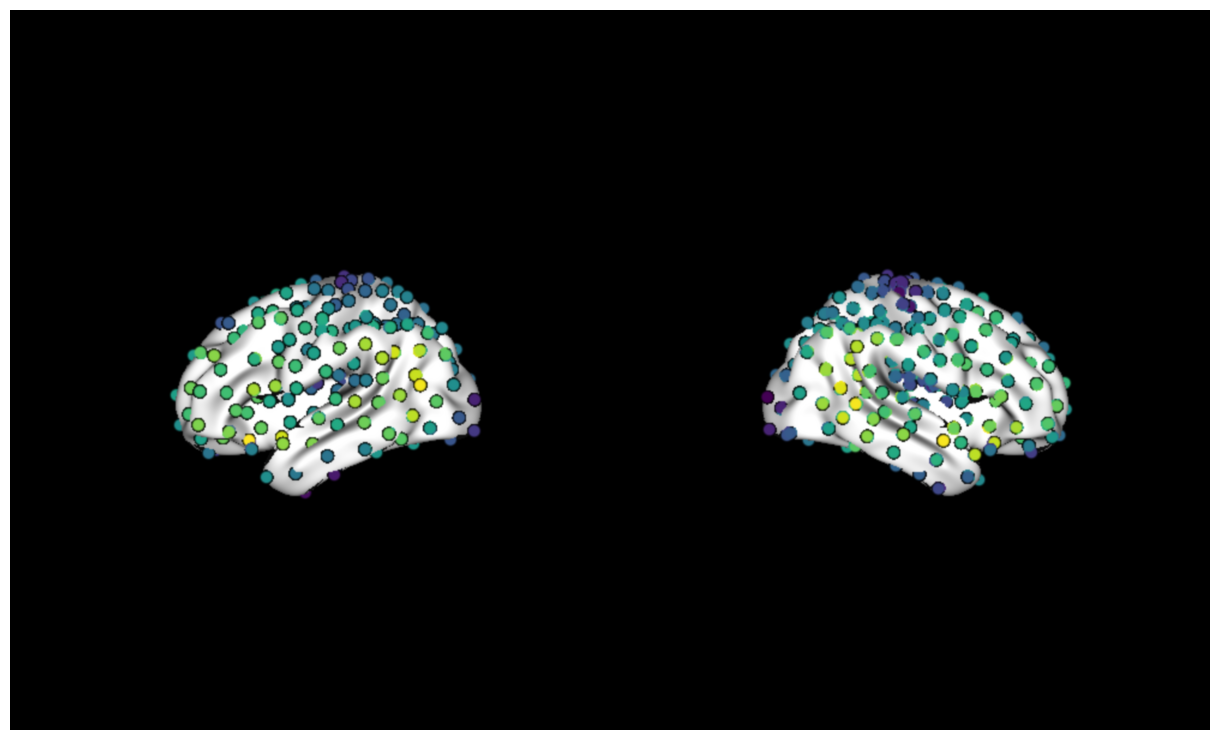

In [28]:
add_B3_to_scene(scene=c2_sc_b3_outer, data=c2_total_pc_mean, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=c2_sc_b3_outer, data=c2_total_pc_mean, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
c2_sc_b3_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


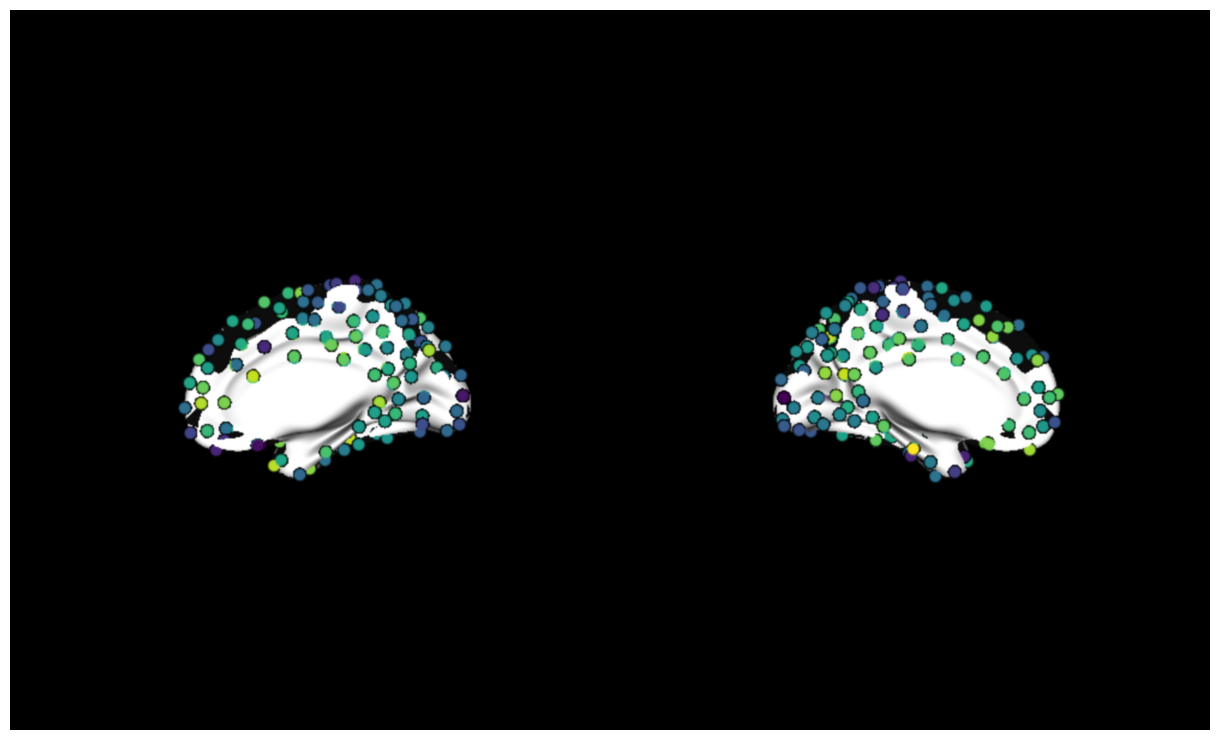

In [29]:
add_B3_to_scene(scene=c2_sc_b3_inner, data=c2_total_pc_mean[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=c2_sc_b3_inner, data=c2_total_pc_mean[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
c2_sc_b3_inner.preview()

In [31]:
add_fs_to_scene(scene=c2_sc_fs_outer, data=c2_total_pc_mean, coords=fs_coords, row=0, col=0, hemisphere='both', orientation='left')
add_fs_to_scene(scene=c2_sc_fs_outer, data=c2_total_pc_mean, coords=fs_coords, row=0, col=1, hemisphere='both', orientation='right')
c1_sc_fs_outer.preview()

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


ValueError: Can not render the canvas. Try to decrease the resolution

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


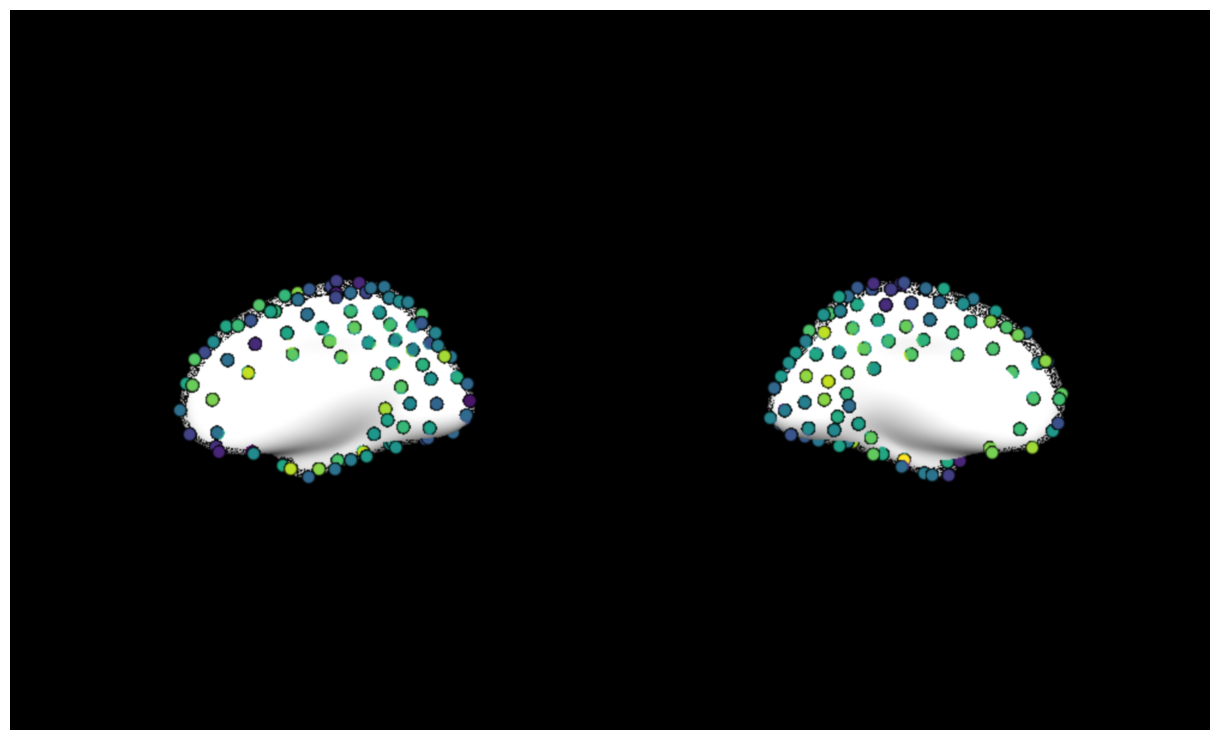

In [32]:
add_fs_to_scene(scene=c2_sc_fs_inner, data=c2_total_pc_mean[0:200], coords=fs_coords_r, row=0, col=0, hemisphere='right', orientation='left')
add_fs_to_scene(scene=c2_sc_fs_inner, data=c2_total_pc_mean[200:400], coords=fs_coords_l, row=0, col=1, hemisphere='left', orientation='right')
c2_sc_fs_inner.preview()

## C3 PC Brain plots

In [33]:
# Create Scene creation
c3_sc_b3_outer = SceneObj(bgcolor='black', size=(1000, 600))
c3_sc_b3_inner = SceneObj(bgcolor='black', size=(1000, 600))

c3_sc_fs_outer = SceneObj(bgcolor='black', size=(1000, 600))
c3_sc_fs_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters for 'title'
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene
Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


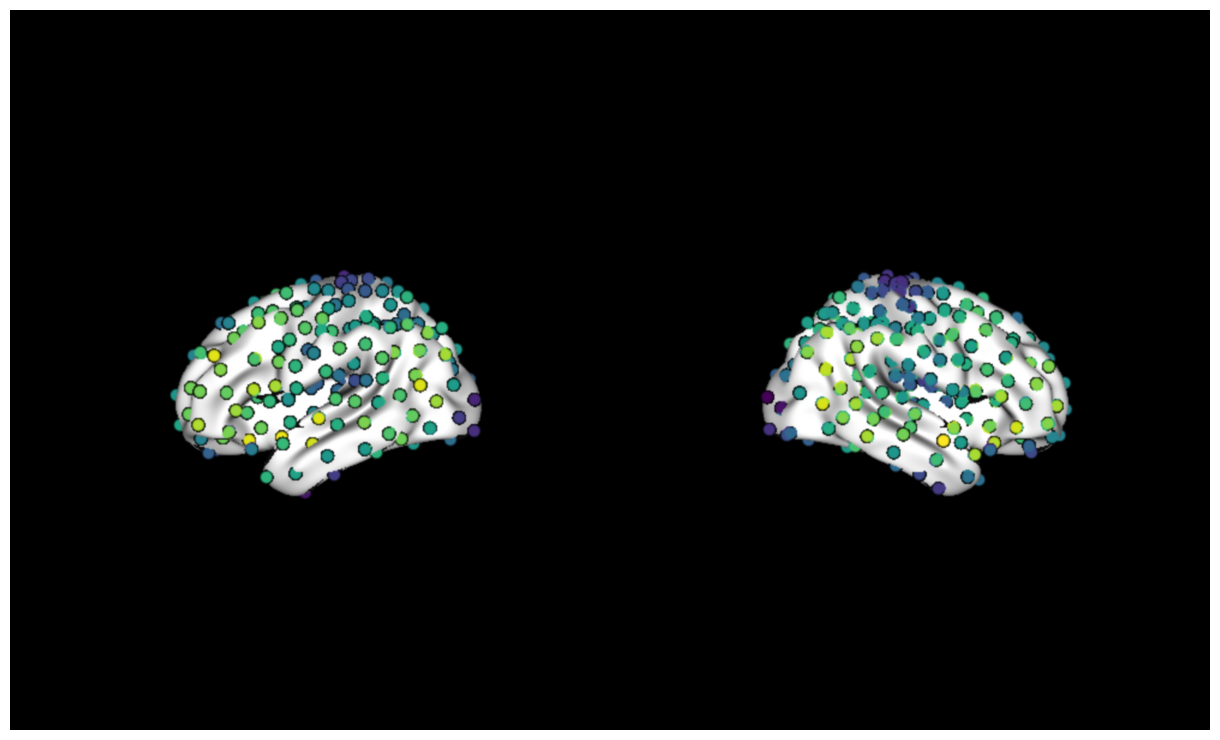

In [34]:
add_B3_to_scene(scene=c3_sc_b3_outer, data=c3_total_pc_mean, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=c3_sc_b3_outer, data=c3_total_pc_mean, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
c3_sc_b3_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


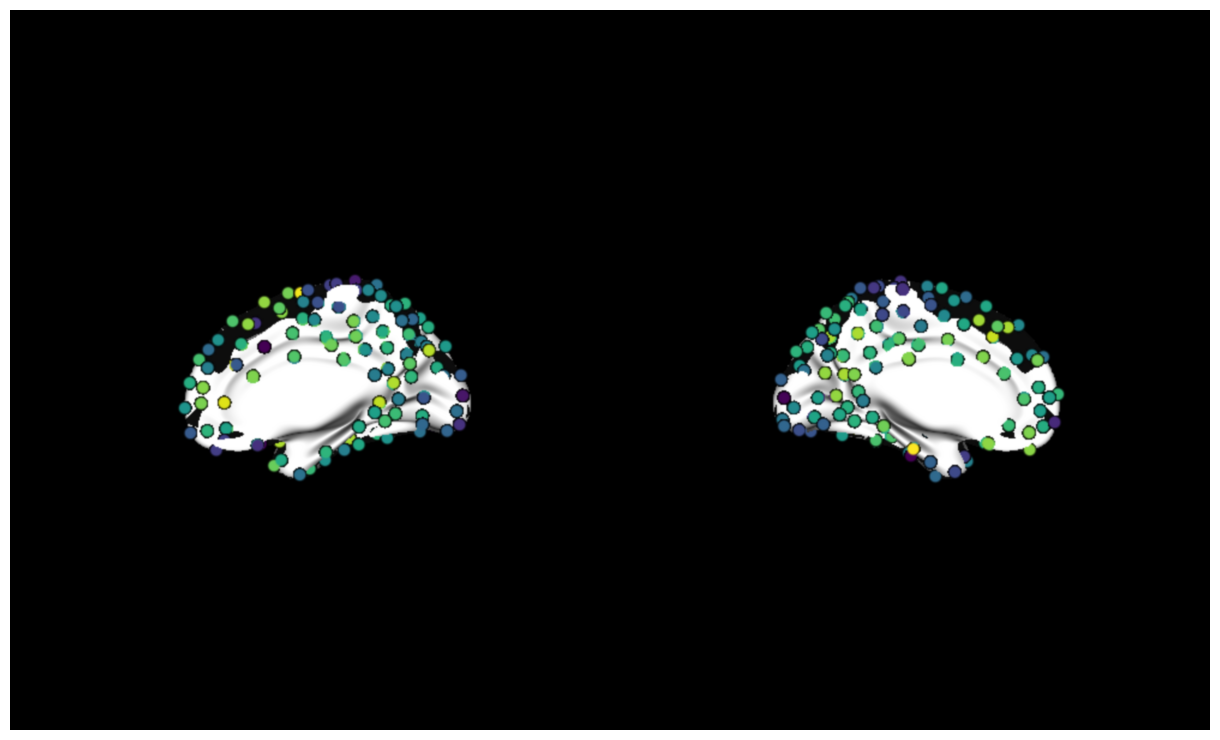

In [35]:
add_B3_to_scene(scene=c3_sc_b3_inner, data=c3_total_pc_mean[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=c3_sc_b3_inner, data=c3_total_pc_mean[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
c3_sc_b3_inner.preview()

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


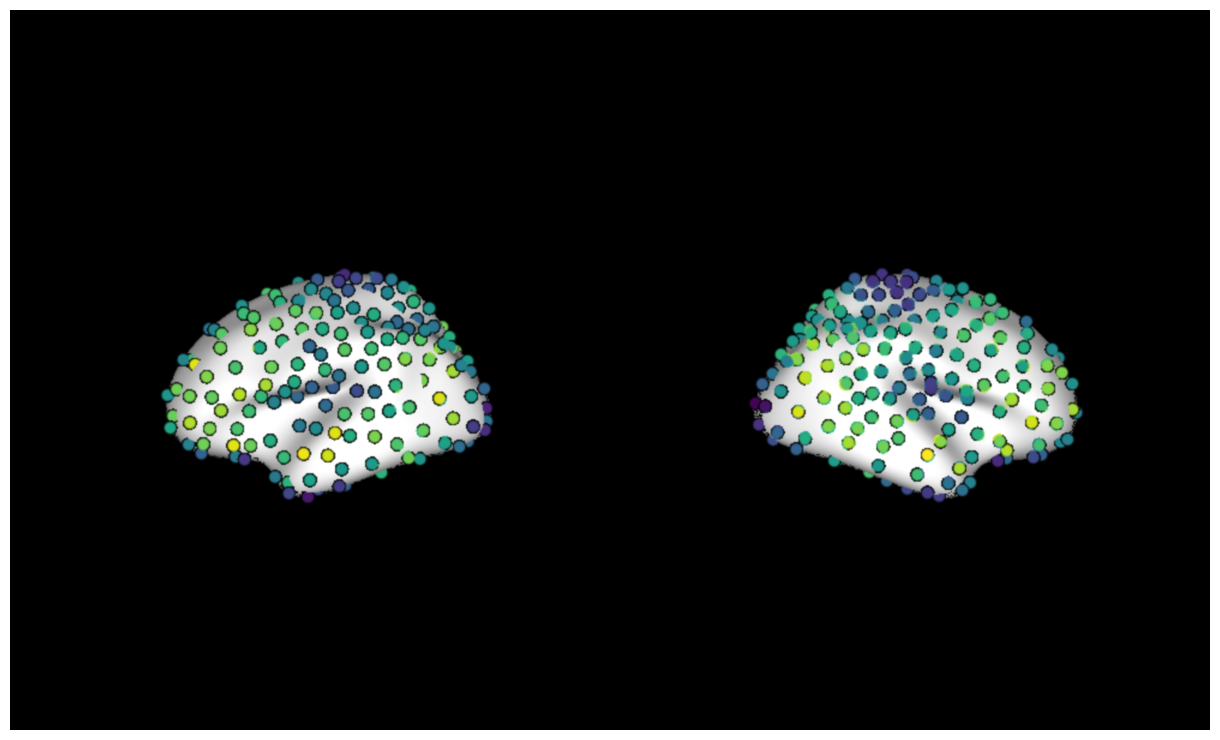

In [36]:
add_fs_to_scene(scene=c3_sc_fs_outer, data=c3_total_pc_mean, coords=fs_coords, row=0, col=0, hemisphere='both', orientation='left')
add_fs_to_scene(scene=c3_sc_fs_outer, data=c3_total_pc_mean, coords=fs_coords, row=0, col=1, hemisphere='both', orientation='right')
c3_sc_fs_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


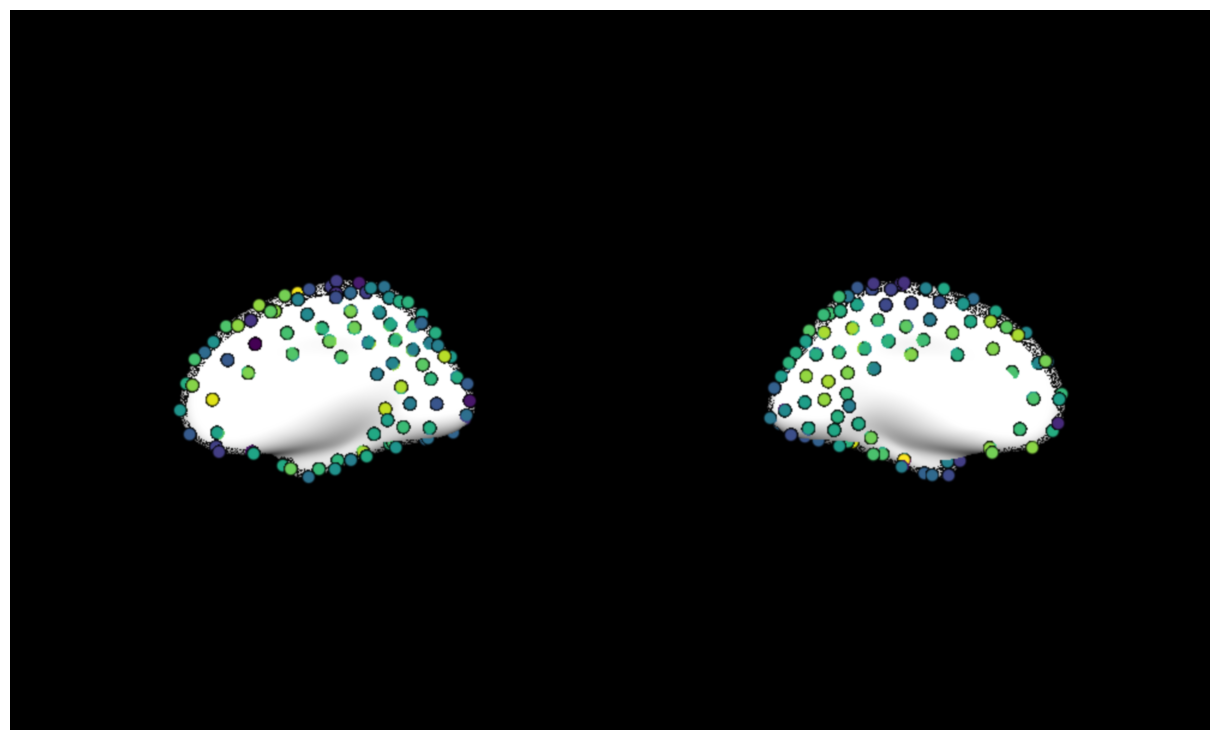

In [37]:
add_fs_to_scene(scene=c3_sc_fs_inner, data=c3_total_pc_mean[0:200], coords=fs_coords_r, row=0, col=0, hemisphere='right', orientation='left')
add_fs_to_scene(scene=c3_sc_fs_inner, data=c3_total_pc_mean[200:400], coords=fs_coords_l, row=0, col=1, hemisphere='left', orientation='right')
c3_sc_fs_inner.preview()

## C4 PC Brain plots

In [38]:
# Create Scene creation
c4_sc_b3_outer = SceneObj(bgcolor='black', size=(1000, 600))
c4_sc_b3_inner = SceneObj(bgcolor='black', size=(1000, 600))

c4_sc_fs_outer = SceneObj(bgcolor='black', size=(1000, 600))
c4_sc_fs_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters for 'title'
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene
Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


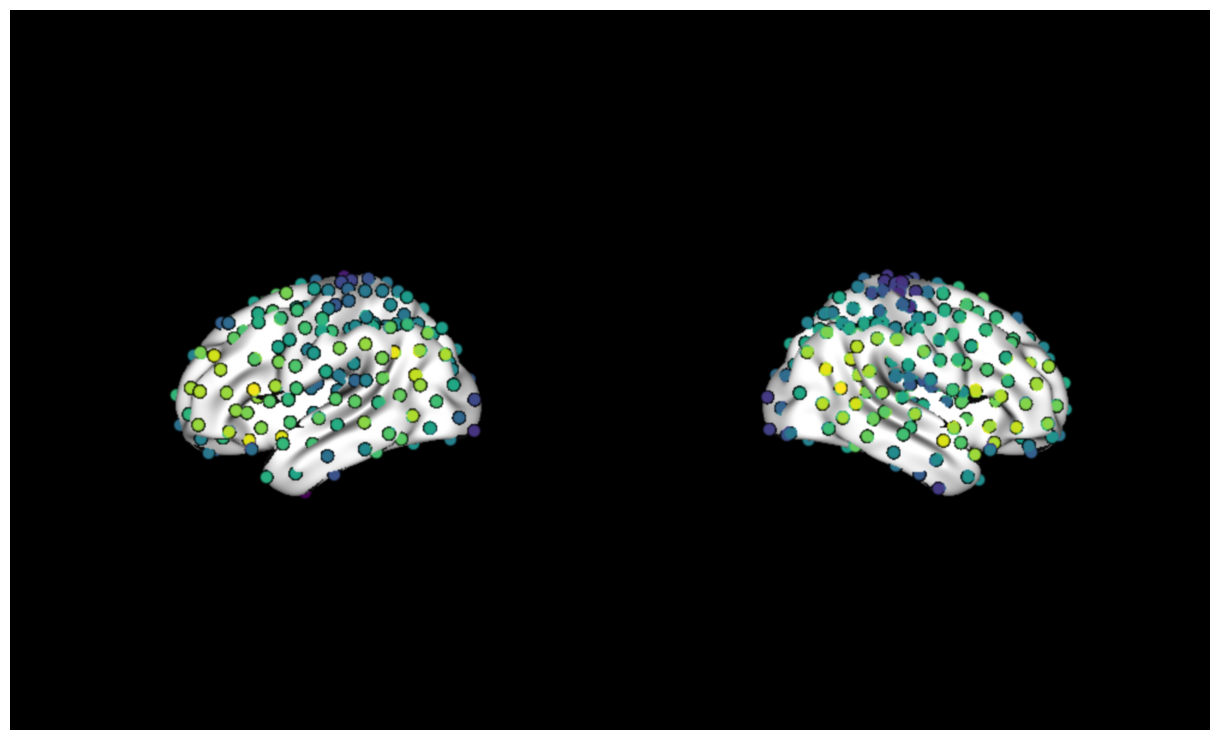

In [39]:
add_B3_to_scene(scene=c4_sc_b3_outer, data=c4_total_pc_mean, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=c4_sc_b3_outer, data=c4_total_pc_mean, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
c4_sc_b3_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


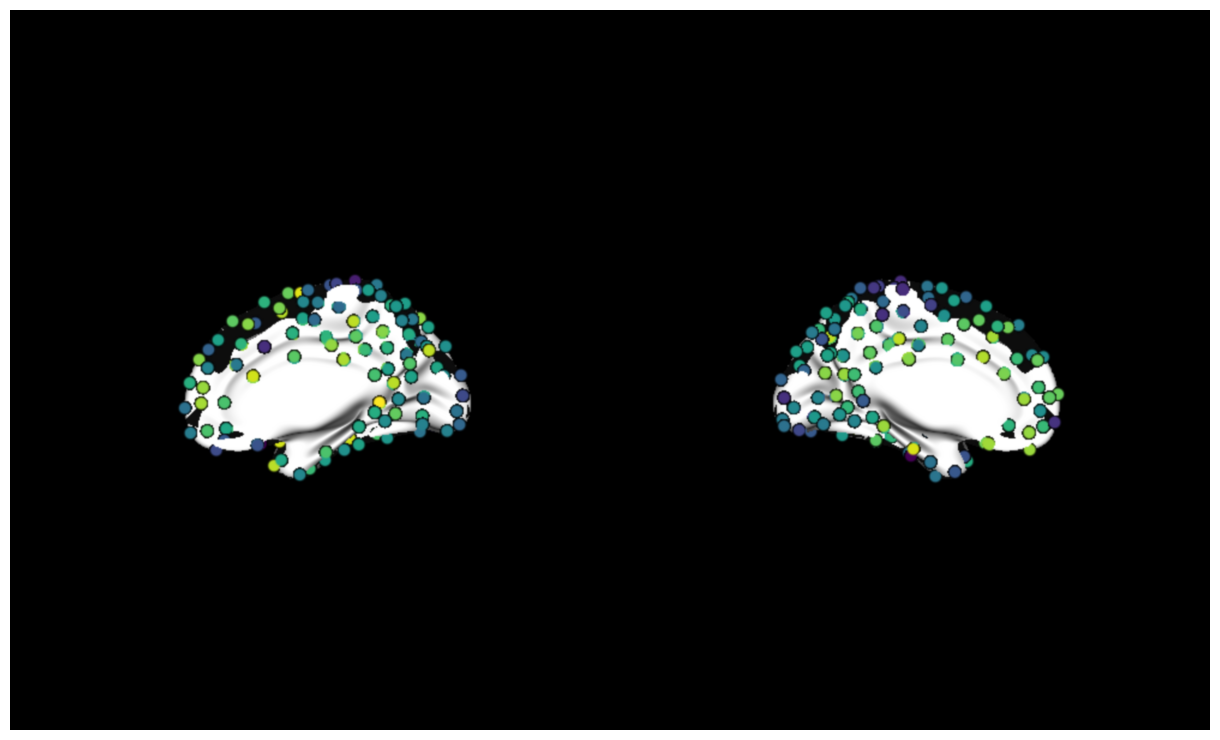

In [40]:
add_B3_to_scene(scene=c4_sc_b3_inner, data=c4_total_pc_mean[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=c4_sc_b3_inner, data=c4_total_pc_mean[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
c4_sc_b3_inner.preview()

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


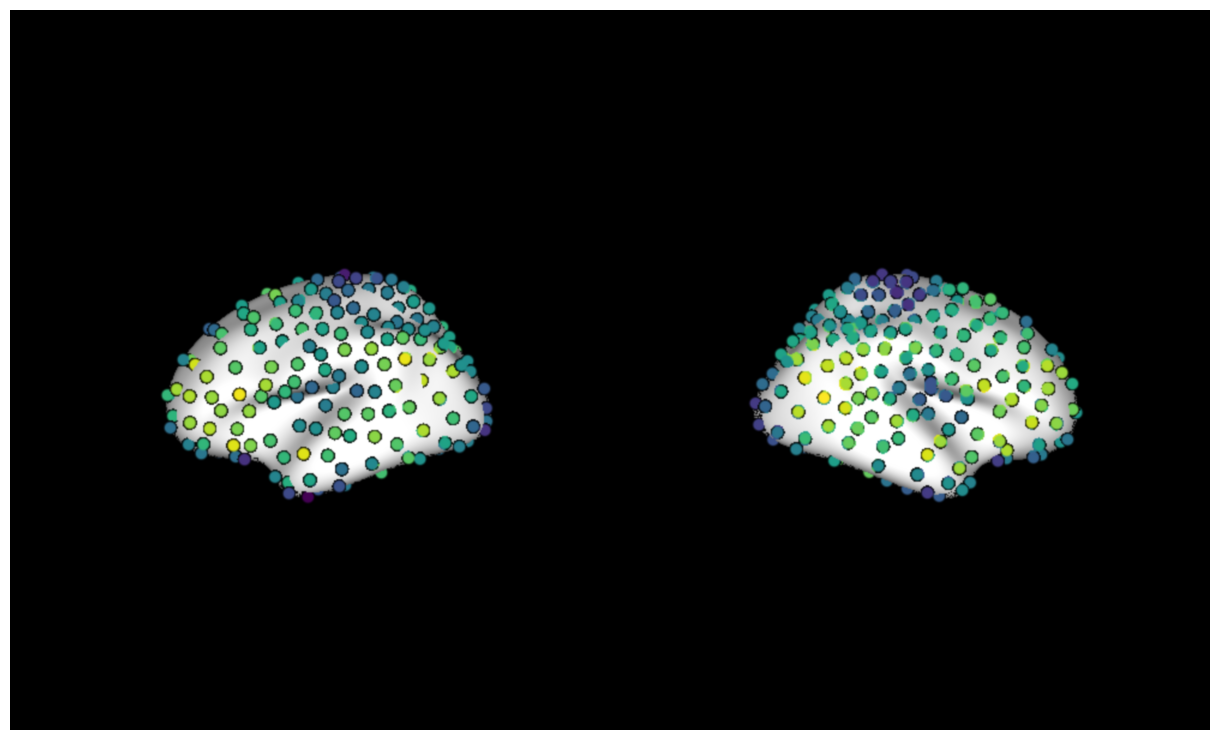

In [41]:
add_fs_to_scene(scene=c4_sc_fs_outer, data=c4_total_pc_mean, coords=fs_coords, row=0, col=0, hemisphere='both', orientation='left')
add_fs_to_scene(scene=c4_sc_fs_outer, data=c4_total_pc_mean, coords=fs_coords, row=0, col=1, hemisphere='both', orientation='right')
c4_sc_fs_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


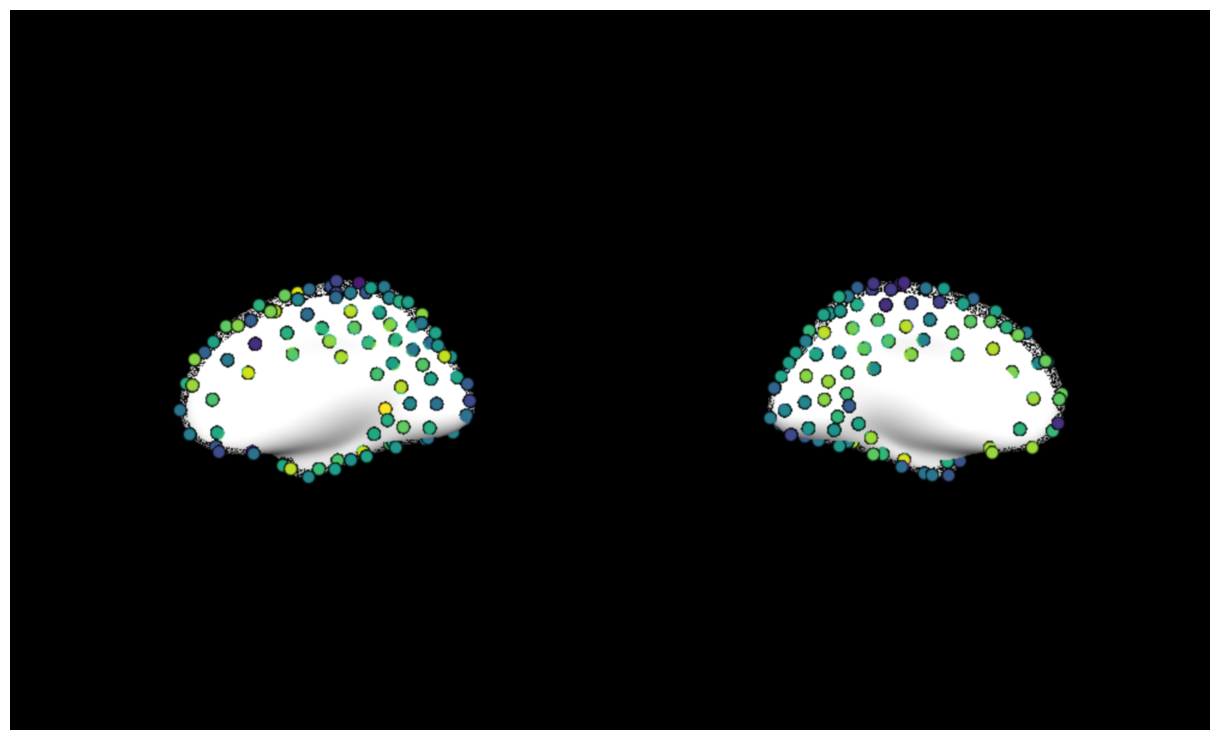

In [42]:
add_fs_to_scene(scene=c4_sc_fs_inner, data=c4_total_pc_mean[0:200], coords=fs_coords_r, row=0, col=0, hemisphere='right', orientation='left')
add_fs_to_scene(scene=c4_sc_fs_inner, data=c4_total_pc_mean[200:400], coords=fs_coords_l, row=0, col=1, hemisphere='left', orientation='right')
c4_sc_fs_inner.preview()

## C1 WCS Brain plots

In [43]:
# Create Scene creation
c1_sc_wcs_b3_outer = SceneObj(bgcolor='black', size=(1000, 600))
c1_sc_wcs_b3_inner = SceneObj(bgcolor='black', size=(1000, 600))

c1_sc_wcs_fs_outer = SceneObj(bgcolor='black', size=(1000, 600))
c1_sc_wcs_fs_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters for 'title'
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene
Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


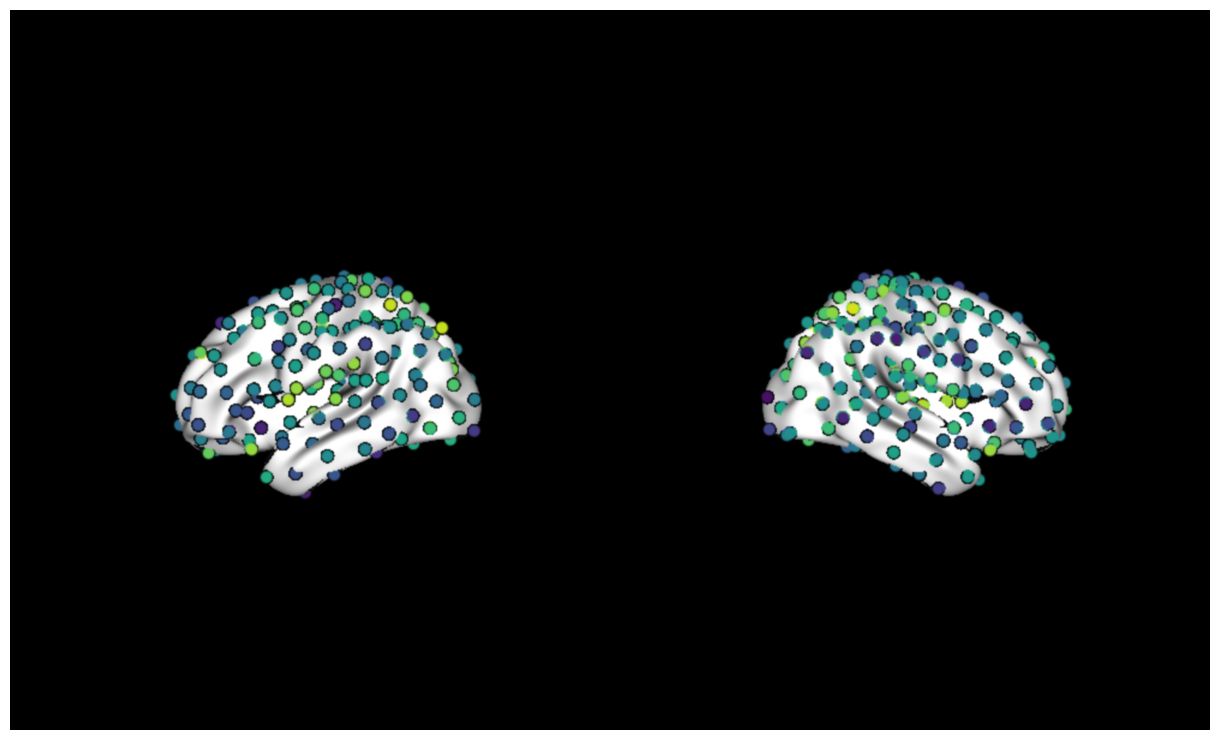

In [44]:
add_B3_to_scene(scene=c1_sc_wcs_b3_outer, data=c1_total_wcs_mean, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=c1_sc_wcs_b3_outer, data=c1_total_wcs_mean, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
c1_sc_wcs_b3_outer.preview()


SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


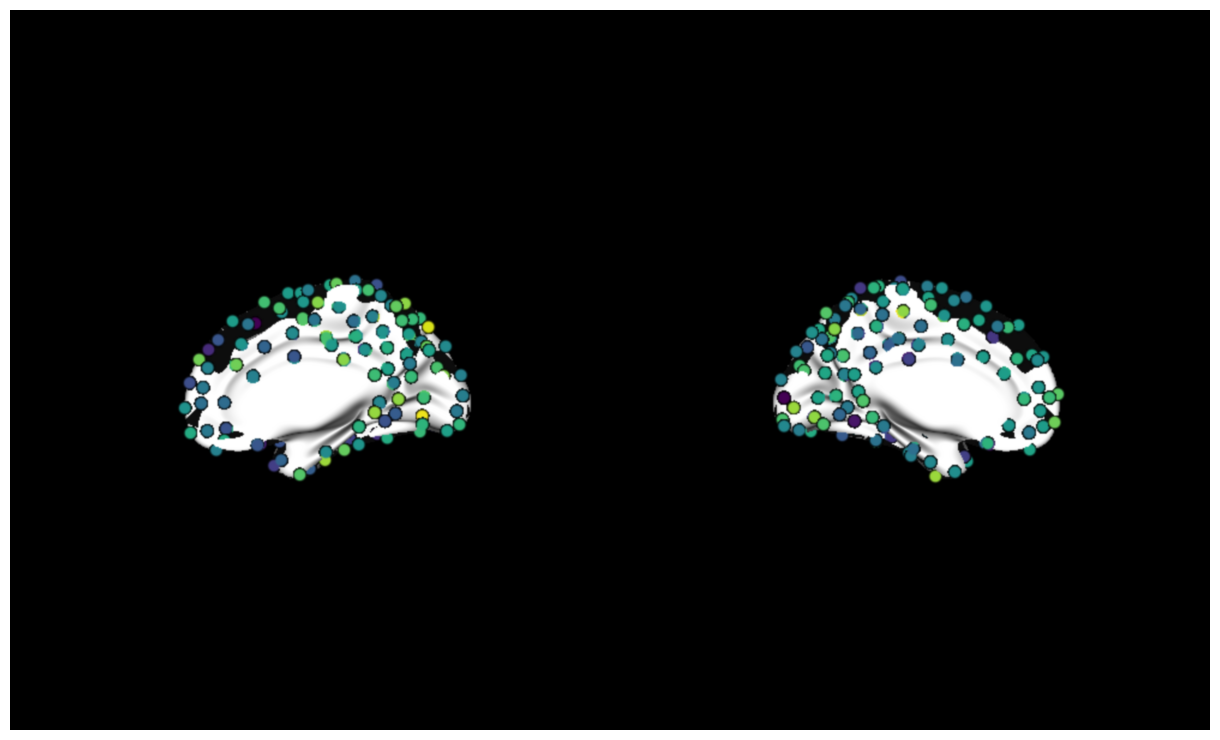

In [45]:
add_B3_to_scene(scene=c1_sc_wcs_b3_inner, data=c1_total_wcs_mean[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=c1_sc_wcs_b3_inner, data=c1_total_wcs_mean[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
c1_sc_wcs_b3_inner.preview()

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


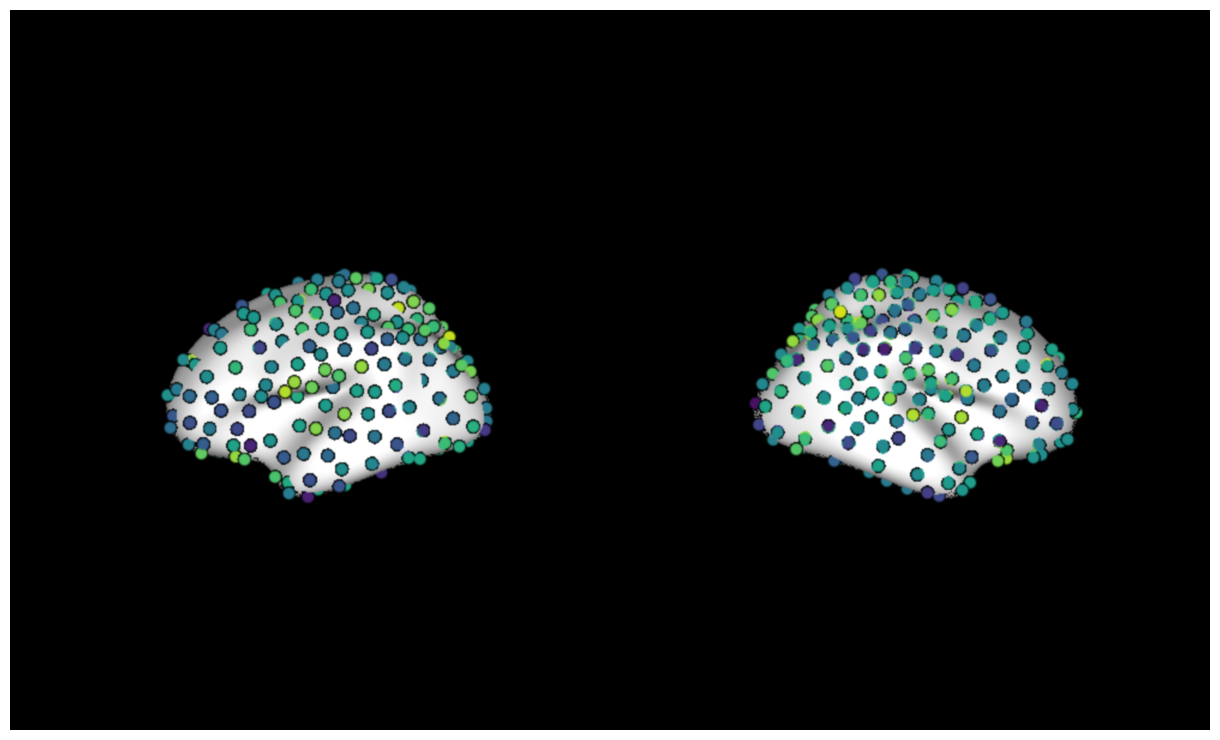

In [46]:
add_fs_to_scene(scene=c1_sc_wcs_fs_outer, data=c1_total_wcs_mean, coords=fs_coords, row=0, col=0, hemisphere='both', orientation='left')
add_fs_to_scene(scene=c1_sc_wcs_fs_outer, data=c1_total_wcs_mean, coords=fs_coords, row=0, col=1, hemisphere='both', orientation='right')
c1_sc_wcs_fs_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


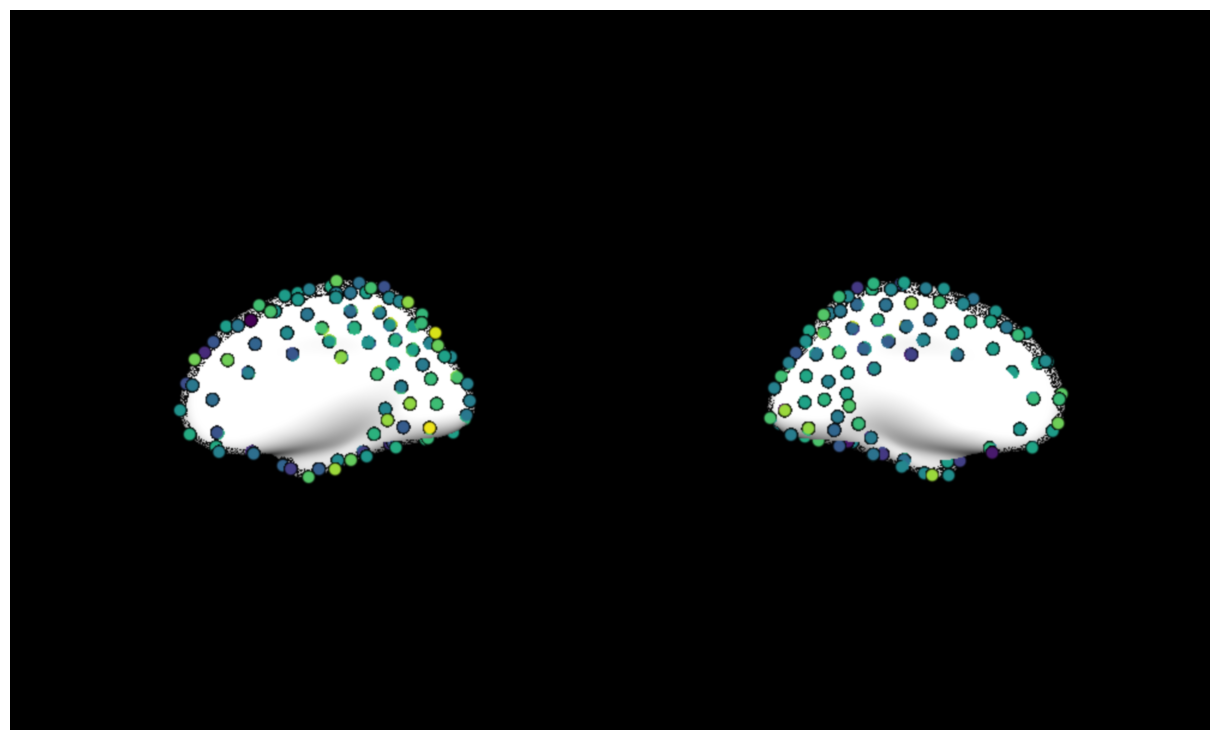

In [47]:
add_fs_to_scene(scene=c1_sc_wcs_fs_inner, data=c1_total_wcs_mean[0:200], coords=fs_coords_r, row=0, col=0, hemisphere='right', orientation='left')
add_fs_to_scene(scene=c1_sc_wcs_fs_inner, data=c1_total_wcs_mean[200:400], coords=fs_coords_l, row=0, col=1, hemisphere='left', orientation='right')
c1_sc_wcs_fs_inner.preview()

## C2 WCS Brain plots

In [48]:
# Create Scene creation
c2_sc_wcs_b3_outer = SceneObj(bgcolor='black', size=(1000, 600))
c2_sc_wcs_b3_inner = SceneObj(bgcolor='black', size=(1000, 600))

c2_sc_wcs_fs_outer = SceneObj(bgcolor='black', size=(1000, 600))
c2_sc_wcs_fs_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters for 'title'
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene
Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


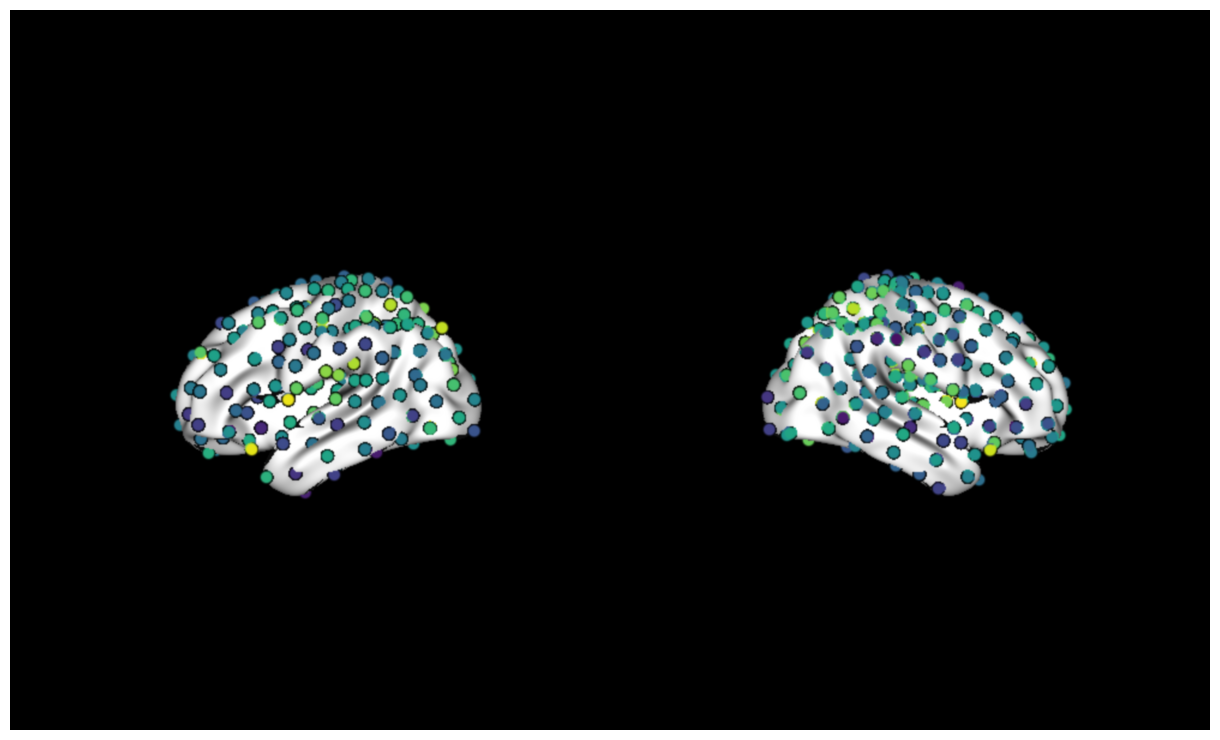

In [49]:
add_B3_to_scene(scene=c2_sc_wcs_b3_outer, data=c2_total_wcs_mean, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=c2_sc_wcs_b3_outer, data=c2_total_wcs_mean, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
c2_sc_wcs_b3_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


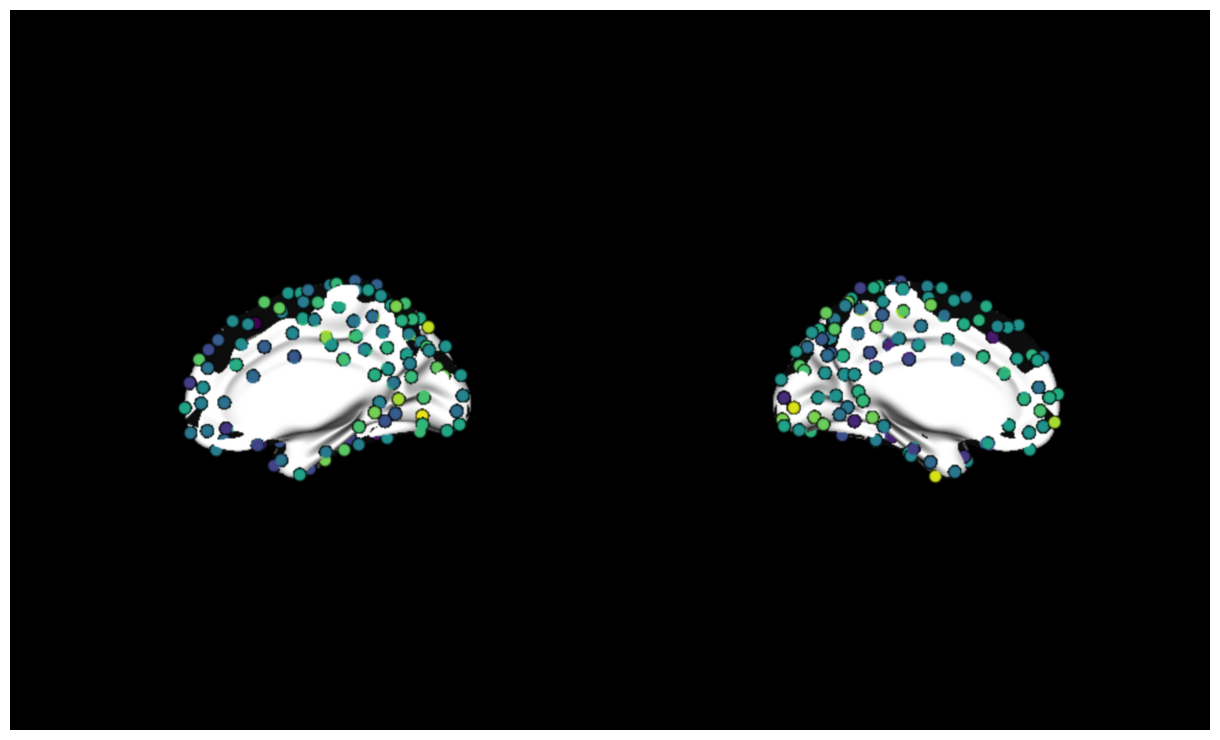

In [50]:
add_B3_to_scene(scene=c2_sc_wcs_b3_inner, data=c2_total_wcs_mean[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=c2_sc_wcs_b3_inner, data=c2_total_wcs_mean[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
c2_sc_wcs_b3_inner.preview()

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


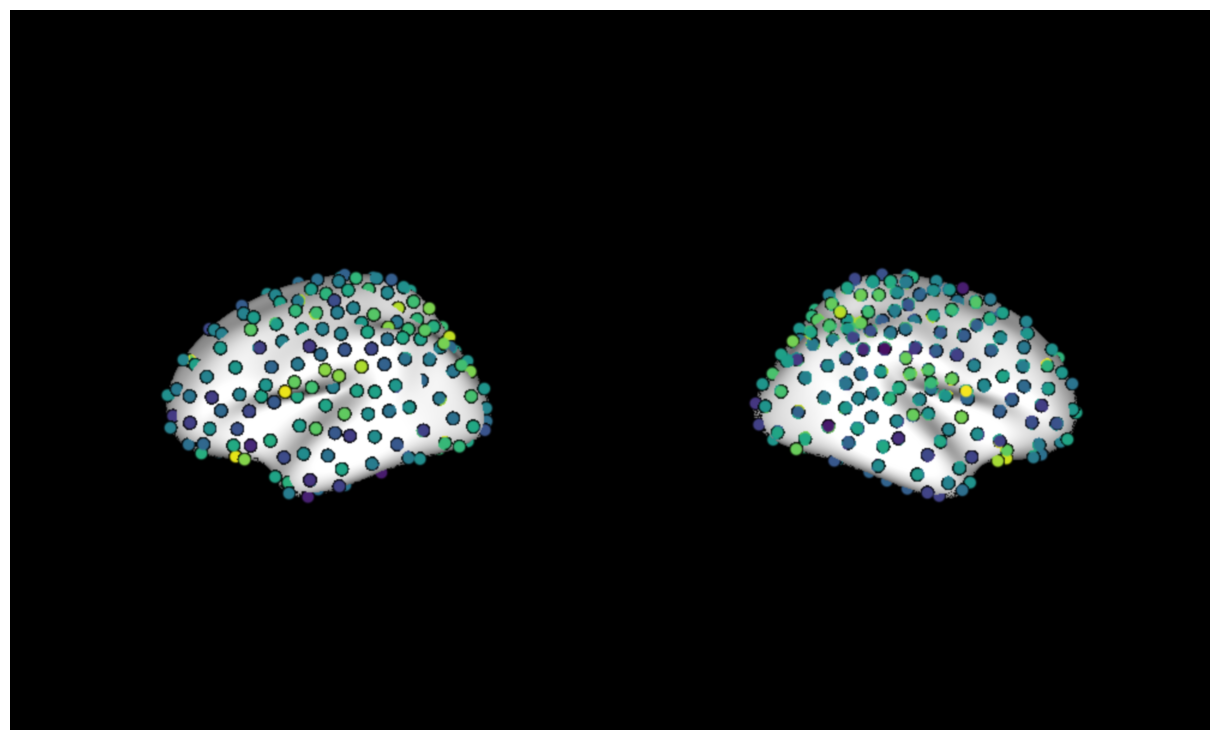

In [51]:
add_fs_to_scene(scene=c2_sc_wcs_fs_outer, data=c2_total_wcs_mean, coords=fs_coords, row=0, col=0, hemisphere='both', orientation='left')
add_fs_to_scene(scene=c2_sc_wcs_fs_outer, data=c2_total_wcs_mean, coords=fs_coords, row=0, col=1, hemisphere='both', orientation='right')
c2_sc_wcs_fs_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


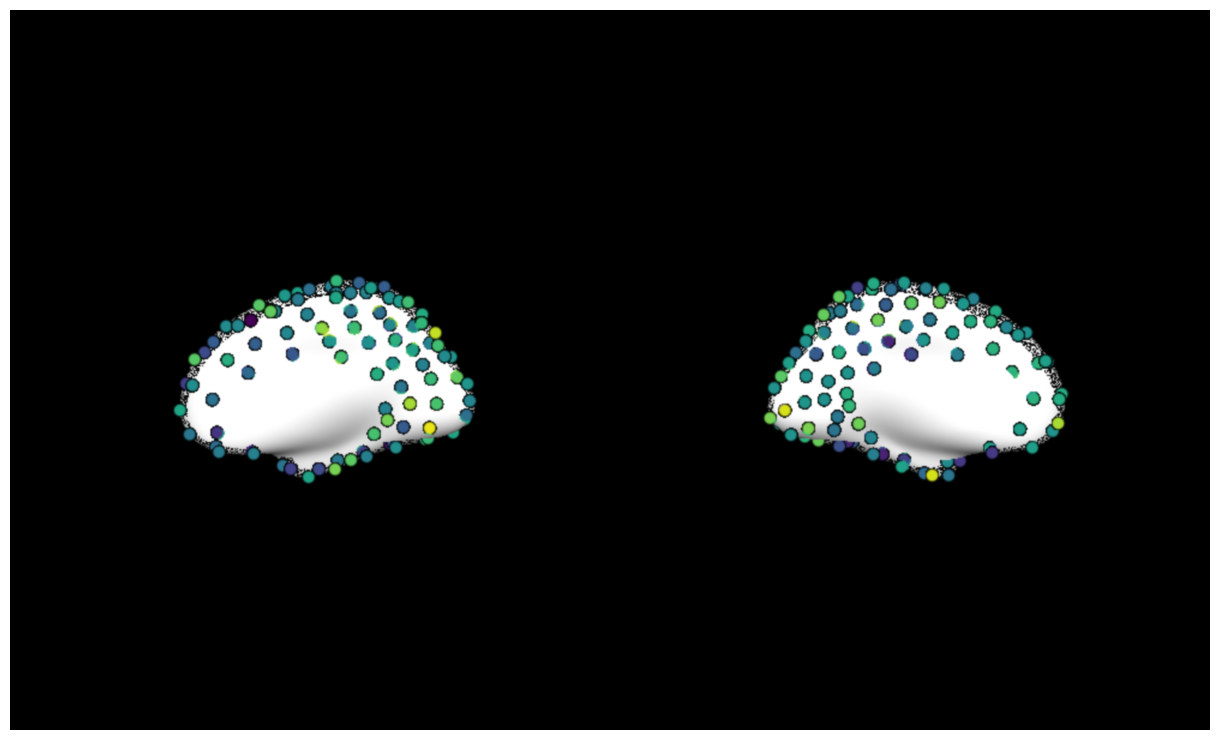

In [52]:
add_fs_to_scene(scene=c2_sc_wcs_fs_inner, data=c2_total_wcs_mean[0:200], coords=fs_coords_r, row=0, col=0, hemisphere='right', orientation='left')
add_fs_to_scene(scene=c2_sc_wcs_fs_inner, data=c2_total_wcs_mean[200:400], coords=fs_coords_l, row=0, col=1, hemisphere='left', orientation='right')
c2_sc_wcs_fs_inner.preview()

## C3 WCS Brain plots

In [53]:
# Create Scene creation
c3_sc_wcs_b3_outer = SceneObj(bgcolor='black', size=(1000, 600))
c3_sc_wcs_b3_inner = SceneObj(bgcolor='black', size=(1000, 600))

c3_sc_wcs_fs_outer = SceneObj(bgcolor='black', size=(1000, 600))
c3_sc_wcs_fs_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters for 'title'
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene
Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


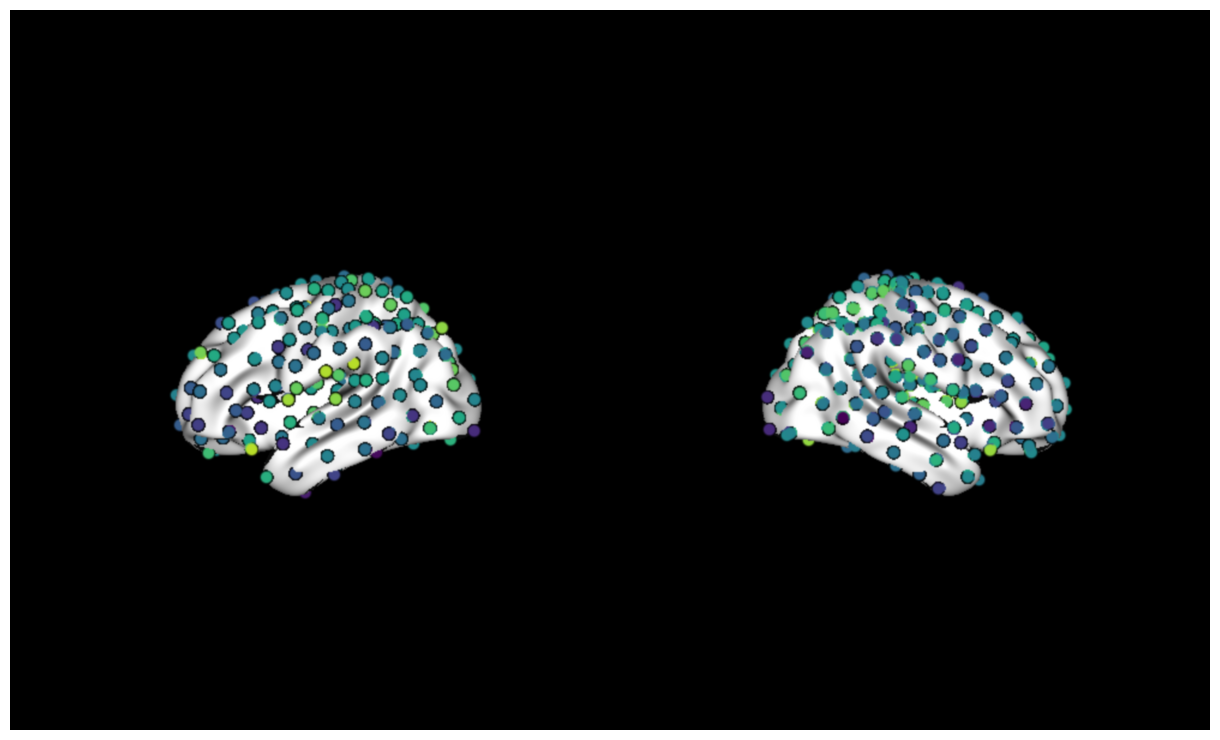

In [54]:
add_B3_to_scene(scene=c3_sc_wcs_b3_outer, data=c3_total_wcs_mean, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=c3_sc_wcs_b3_outer, data=c3_total_wcs_mean, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
c3_sc_wcs_b3_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


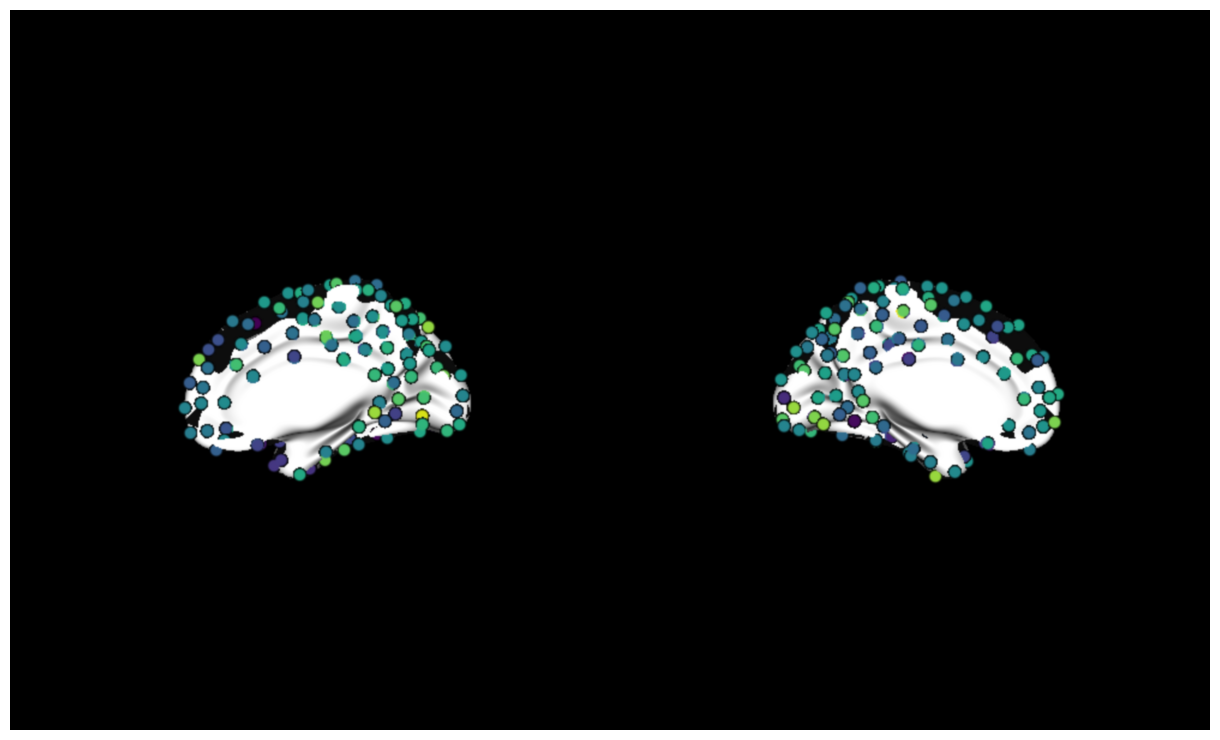

In [55]:
add_B3_to_scene(scene=c3_sc_wcs_b3_inner, data=c3_total_wcs_mean[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=c3_sc_wcs_b3_inner, data=c3_total_wcs_mean[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
c3_sc_wcs_b3_inner.preview()

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


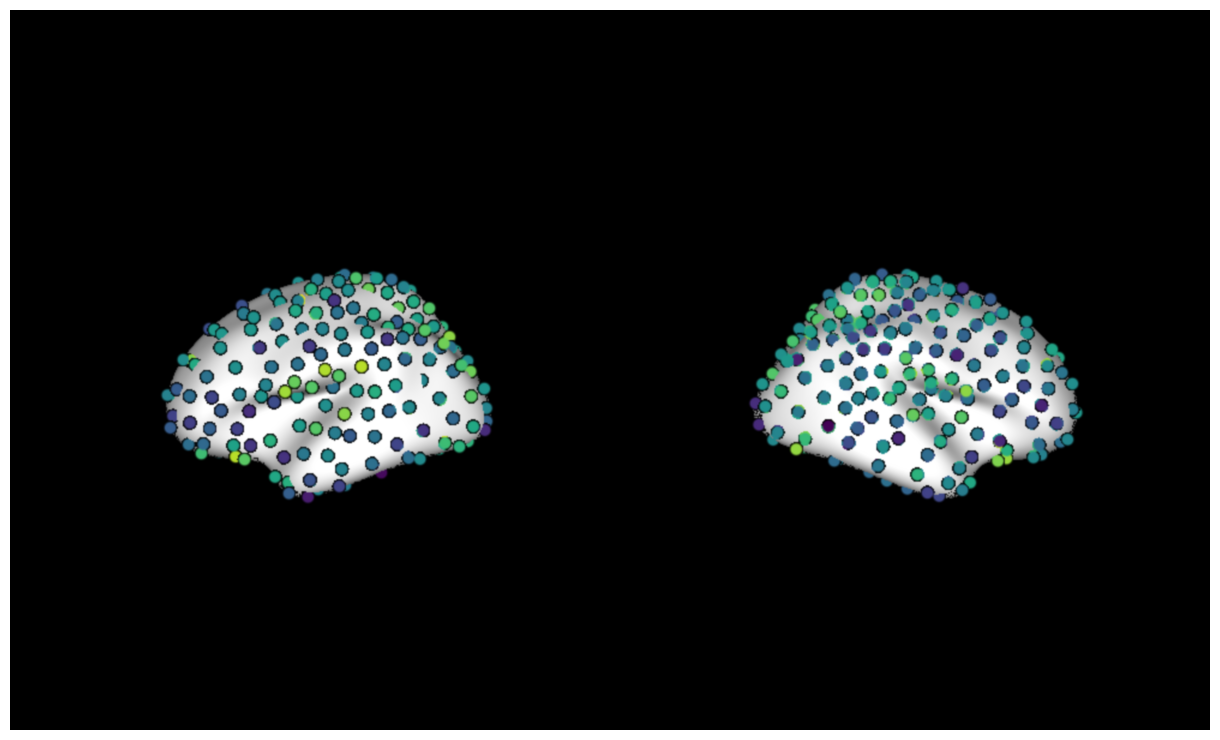

In [56]:
add_fs_to_scene(scene=c3_sc_wcs_fs_outer, data=c3_total_wcs_mean, coords=fs_coords, row=0, col=0, hemisphere='both', orientation='left')
add_fs_to_scene(scene=c3_sc_wcs_fs_outer, data=c3_total_wcs_mean, coords=fs_coords, row=0, col=1, hemisphere='both', orientation='right')
c3_sc_wcs_fs_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


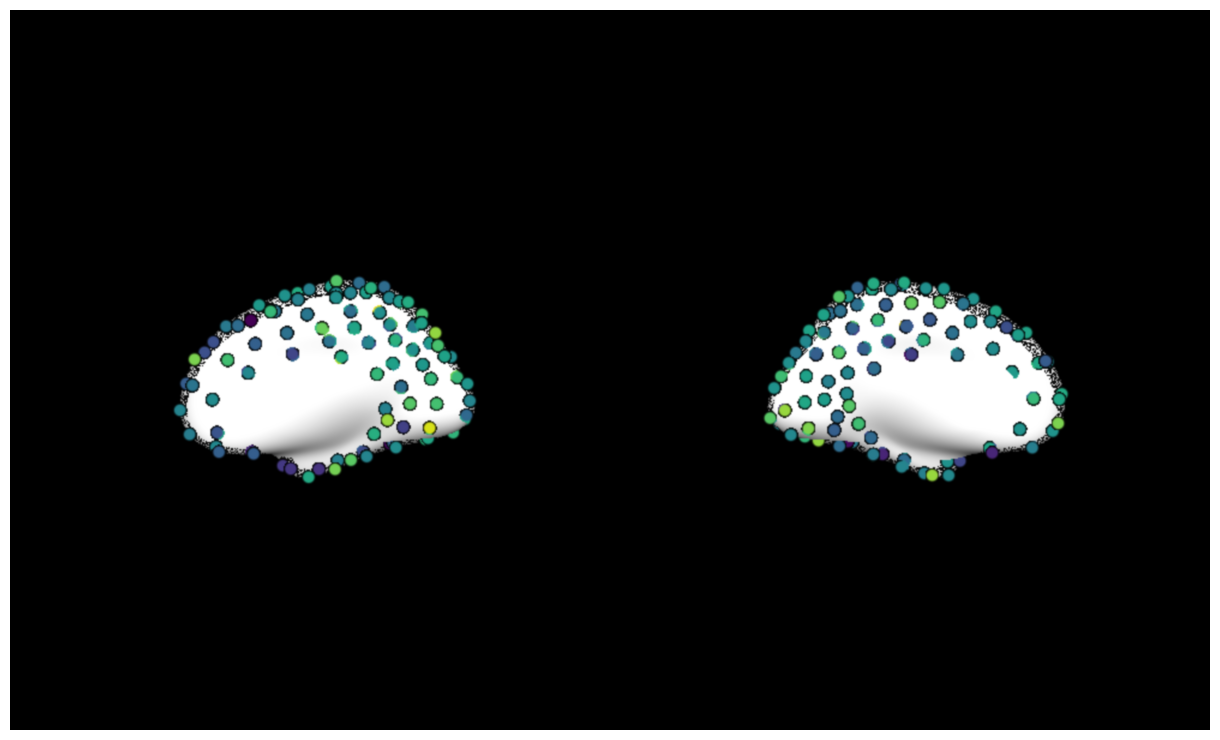

In [57]:
add_fs_to_scene(scene=c3_sc_wcs_fs_inner, data=c3_total_wcs_mean[0:200], coords=fs_coords_r, row=0, col=0, hemisphere='right', orientation='left')
add_fs_to_scene(scene=c3_sc_wcs_fs_inner, data=c3_total_wcs_mean[200:400], coords=fs_coords_l, row=0, col=1, hemisphere='left', orientation='right')
c3_sc_wcs_fs_inner.preview()

## C4 WCS Brain plots

In [58]:
# Create Scene creation
c4_sc_wcs_b3_outer = SceneObj(bgcolor='black', size=(1000, 600))
c4_sc_wcs_b3_inner = SceneObj(bgcolor='black', size=(1000, 600))

c4_sc_wcs_fs_outer = SceneObj(bgcolor='black', size=(1000, 600))
c4_sc_wcs_fs_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters for 'title'
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene
Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


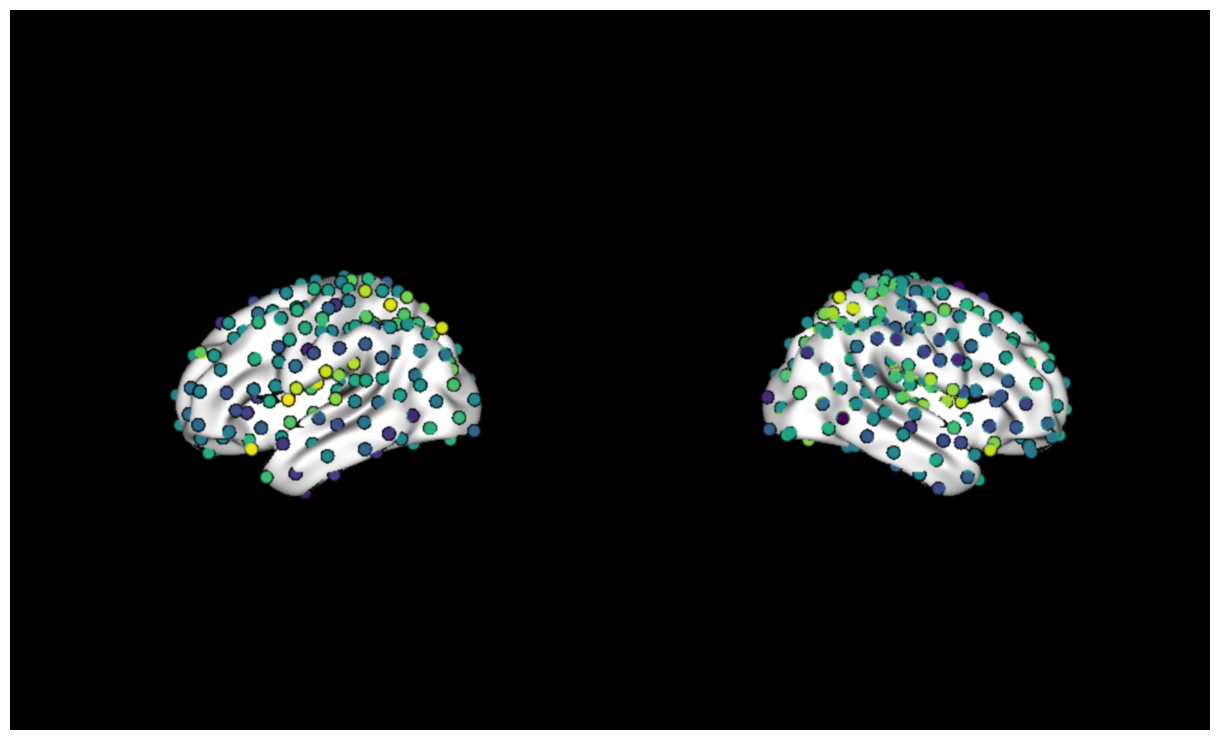

In [59]:
add_B3_to_scene(scene=c4_sc_wcs_b3_outer, data=c4_total_wcs_mean, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=c4_sc_wcs_b3_outer, data=c4_total_wcs_mean, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
c4_sc_wcs_b3_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


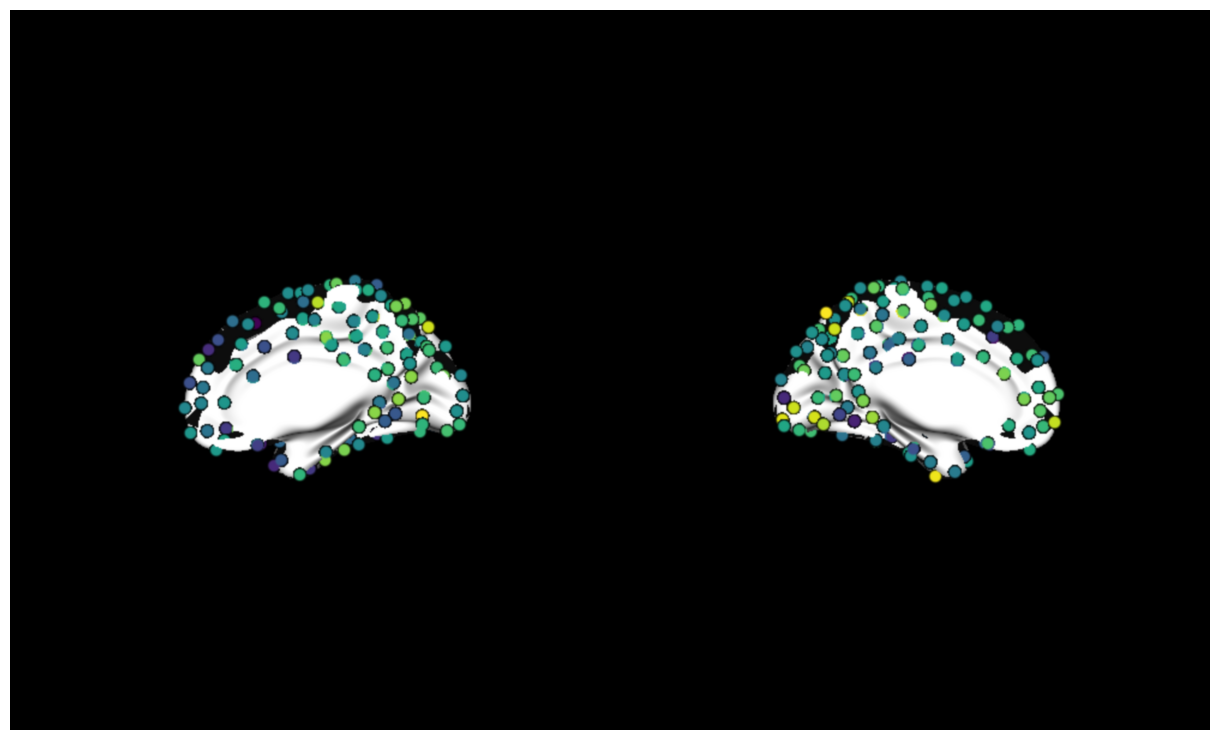

In [60]:
add_B3_to_scene(scene=c4_sc_wcs_b3_inner, data=c4_total_wcs_mean[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=c4_sc_wcs_b3_inner, data=c4_total_wcs_mean[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
c4_sc_wcs_b3_inner.preview()

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


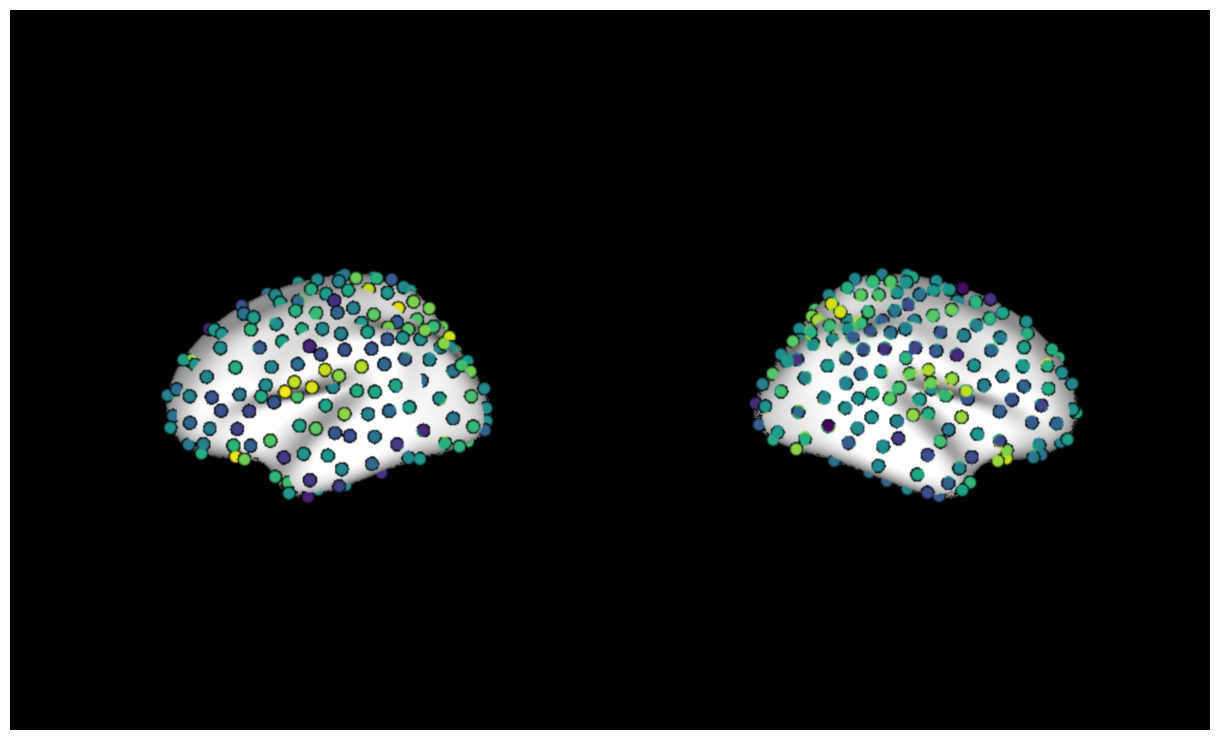

In [61]:
add_fs_to_scene(scene=c4_sc_wcs_fs_outer, data=c4_total_wcs_mean, coords=fs_coords, row=0, col=0, hemisphere='both', orientation='left')
add_fs_to_scene(scene=c4_sc_wcs_fs_outer, data=c4_total_wcs_mean, coords=fs_coords, row=0, col=1, hemisphere='both', orientation='right')
c4_sc_wcs_fs_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='inflated') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='inflated') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


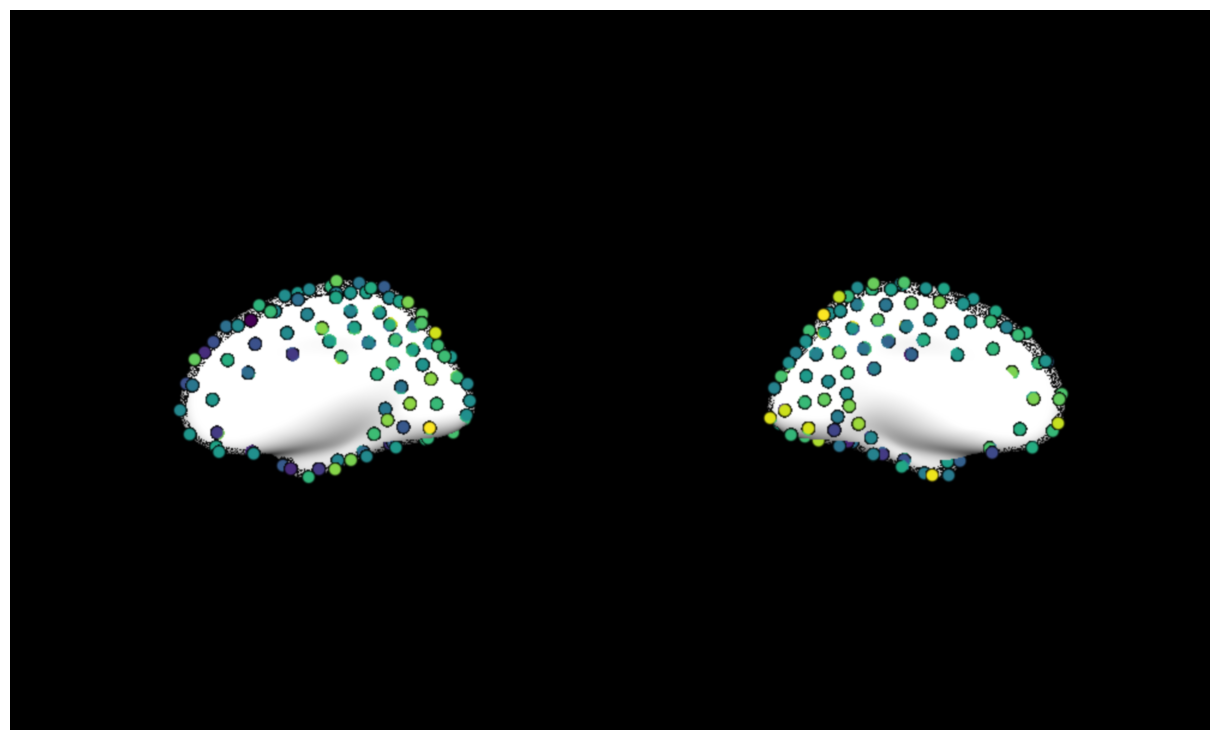

In [62]:
add_fs_to_scene(scene=c4_sc_wcs_fs_inner, data=c4_total_wcs_mean[0:200], coords=fs_coords_r, row=0, col=0, hemisphere='right', orientation='left')
add_fs_to_scene(scene=c4_sc_wcs_fs_inner, data=c4_total_wcs_mean[200:400], coords=fs_coords_l, row=0, col=1, hemisphere='left', orientation='right')
c4_sc_wcs_fs_inner.preview()